In [1]:
# Importing libraries and dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [4]:
#Importing data
df= pd.read_csv(r'credit_score.csv')

In [5]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
#Keeping copy of file for future
df1= df.copy()

In [7]:
# Data Cleaning and Preprocessing

In [8]:
#To display top 5 rows of the table
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [9]:
#To display number of rows and columns
df.shape

(100000, 28)

In [10]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [11]:
#To display data types of columns
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [12]:
#To display list of columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
#To display number of missing values and treat them
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [14]:
#To display number of duplicate values
df.duplicated().sum()

0

In [15]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          3635
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio     99998
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98790
Credit_Score                     3
dtype: int64

In [16]:
def check_count(column):
  print('Number of unique values are:', df[column].nunique())
  print('Null values are:', df[column].isnull().sum())
  print('Types of values are:')
  print(df[column].value_counts(dropna=False).head())

In [17]:
def Num_fillna(df, column, inplace=True):
      df_range = df[df[column].notna()].groupby('Customer_ID')[column].apply(list)
      x, y = df_range.apply(lambda x: stats.mode(x)).apply([min, max])
      mini, maxi = x[0][0], y[0][0]

      col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

      mode_of_group = df.groupby('Customer_ID')[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
      df[column] = col.fillna(mode_of_group)

In [18]:
def Object_fillna(df, column, inplace=True):
  if df[column].isin([None]).sum():
    df[column][df[column].isin([None])] = np.NaN

  df[column] = df.groupby('Customer_ID')[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [19]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')


In [20]:
# Working on categorical columns
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [21]:
# Month

In [22]:
check_count('Month')

Number of unique values are: 8
Null values are: 0
Types of values are:
January     12500
February    12500
March       12500
April       12500
May         12500
Name: Month, dtype: int64


In [23]:
# Changing month to number
df['Month']=pd.to_datetime(df.Month, format='%B').dt.month

In [24]:
# Name

In [25]:
check_count('Name')

Number of unique values are: 10139
Null values are: 9985
Types of values are:
NaN         9985
Stevex        44
Langep        44
Jessicad      39
Vaughanl      39
Name: Name, dtype: int64


In [26]:
# Adding nan values to Name
Object_fillna(df, 'Name', inplace=True)

In [27]:
# Age

In [28]:
check_count('Age')

Number of unique values are: 1788
Null values are: 0
Types of values are:
38    2833
28    2829
31    2806
26    2792
32    2749
Name: Age, dtype: int64


In [29]:
# Removing underscore from the end of the values
df['Age']= df['Age'].str.rstrip('_')

In [30]:
# Changing data type from object to float
df['Age']= df['Age'].astype(float)

In [31]:
# SSN

In [32]:
check_count('SSN')

Number of unique values are: 12501
Null values are: 0
Types of values are:
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
Name: SSN, dtype: int64


In [33]:
# Replacing values of punctuation mark to nan
df['SSN']= df['SSN'].replace('#F%$D@*&8', np.NaN)
df['SSN'].value_counts().head()

078-73-5990    8
439-76-5364    8
750-67-7525    8
903-50-0305    8
376-28-6303    8
Name: SSN, dtype: int64

In [34]:
# Replacing - with empty
df['SSN']= df['SSN'].str.replace('-', '')
df['SSN'].value_counts().head()

078735990    8
439765364    8
750677525    8
903500305    8
376286303    8
Name: SSN, dtype: int64

In [35]:
# checking null values in SSN
df['SSN'].isnull().sum()

5572

In [36]:
# Filling nan values of SSN to mode
Object_fillna(df, 'SSN')

In [37]:
# Occupation

In [38]:
check_count('Occupation')

Number of unique values are: 16
Null values are: 0
Types of values are:
_______      7062
Lawyer       6575
Architect    6355
Engineer     6350
Scientist    6299
Name: Occupation, dtype: int64


In [39]:
# Replacing ___ values with nan
df['Occupation']= df['Occupation'].replace('_______', np.NaN)
df['Occupation'].value_counts().head()

Lawyer       6575
Architect    6355
Engineer     6350
Scientist    6299
Mechanic     6291
Name: Occupation, dtype: int64

In [40]:
# Filling nan values of Occupation to mode
Object_fillna(df, 'Occupation')

In [41]:
# Annual_Income

In [42]:
check_count('Annual_Income')

Number of unique values are: 18940
Null values are: 0
Types of values are:
36585.12    16
20867.67    16
17273.83    16
9141.63     15
33029.66    15
Name: Annual_Income, dtype: int64


In [43]:
# Removing underscore from the end of the values
df['Annual_Income']= df['Annual_Income'].str.rstrip('_')

In [44]:
# Changing data type from object to float
df['Annual_Income']= df['Annual_Income'].astype(float)

In [45]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Annual_Income')

In [46]:
# Num_of_Loan

In [47]:
check_count('Num_of_Loan')

Number of unique values are: 434
Null values are: 0
Types of values are:
3    14386
2    14250
4    14016
0    10380
1    10083
Name: Num_of_Loan, dtype: int64


In [48]:
# Removing underscore from the end of the values
df['Num_of_Loan'] = df['Num_of_Loan'].str.rstrip('_')

In [49]:
# Changing data type from object to float
df['Num_of_Loan']= df['Num_of_Loan'].astype(float)

In [50]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Num_of_Loan')

In [51]:
# Type_of_Loan

In [52]:
check_count('Type_of_Loan')

Number of unique values are: 6260
Null values are: 11408
Types of values are:
NaN                        11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Name: Type_of_Loan, dtype: int64


In [53]:
df['Type_of_Loan'].replace(np.NaN, 'No Info', inplace=True)

In [54]:
# Num_of_Delayed_Payment

In [55]:
check_count('Num_of_Delayed_Payment')

Number of unique values are: 749
Null values are: 7002
Types of values are:
NaN    7002
19     5327
17     5261
16     5173
10     5153
Name: Num_of_Delayed_Payment, dtype: int64


In [56]:
# Removing underscore from the end of the values
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.rstrip('_')

In [57]:
# Changing data type from object to float
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].astype(float)

In [58]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Num_of_Delayed_Payment')

In [59]:
# Changed_Credit_Limit

In [60]:
check_count('Changed_Credit_Limit')

Number of unique values are: 3635
Null values are: 0
Types of values are:
_        2091
8.22      135
11.5      127
11.32     126
7.35      121
Name: Changed_Credit_Limit, dtype: int64


In [61]:
# Replacing underscore value to nan
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].replace('_', np.NaN)

In [62]:
# Changing data type from object to float
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].astype(float)

In [63]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Changed_Credit_Limit')

In [64]:
# Credit_Mix

In [65]:
check_count('Credit_Mix')

Number of unique values are: 4
Null values are: 0
Types of values are:
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


In [66]:
# Replacing underscore value to nan
df['Credit_Mix']= df['Credit_Mix'].replace('_', np.NaN)

In [67]:
# Filling nan values to mode of Credit_Mix
Object_fillna(df, 'Credit_Mix')

In [68]:
# Outstanding_Debt

In [69]:
check_count('Outstanding_Debt')

Number of unique values are: 13178
Null values are: 0
Types of values are:
1360.45    24
460.46     23
1151.7     23
1109.03    23
467.7      16
Name: Outstanding_Debt, dtype: int64


In [70]:
# Removing underscore from the end of the values
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.rstrip('_')

In [71]:
# Changing data type from object to float
df['Outstanding_Debt']= df['Outstanding_Debt'].astype(float)

In [72]:
# Credit_History_Age

In [73]:
check_count('Credit_History_Age')

Number of unique values are: 404
Null values are: 9030
Types of values are:
NaN                       9030
15 Years and 11 Months     446
19 Years and 4 Months      445
19 Years and 5 Months      444
17 Years and 11 Months     443
Name: Credit_History_Age, dtype: int64


In [74]:
# Creating user defined function to calculate number of months
def Month_Converter(x):
    if pd.notnull(x):
        year = int(x.split(' ')[0])
        month = int(x.split(' ')[3])

        return (year*12)+month
    else:
        return x

In [75]:
# Changing to float data type
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [76]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Credit_History_Age')

In [77]:
# Payment_of_Min_Amount

In [78]:
check_count('Payment_of_Min_Amount')

Number of unique values are: 3
Null values are: 0
Types of values are:
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


In [79]:
# Amount_invested_monthly

In [80]:
check_count('Amount_invested_monthly')

Number of unique values are: 91049
Null values are: 4479
Types of values are:
NaN            4479
__10000__      4305
0               169
36.66235139       1
89.73848936       1
Name: Amount_invested_monthly, dtype: int64


In [81]:
# Removing underscore from the end of the values
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.strip('__')

In [82]:
# Changing data type from object to float
df['Amount_invested_monthly']= df['Amount_invested_monthly'].astype(float)

In [83]:
# Rounding the values to 3 digits
df['Amount_invested_monthly']= df['Amount_invested_monthly'].round(3)

In [84]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Amount_invested_monthly')

In [85]:
# Payment_Behaviour

In [86]:
check_count('Payment_Behaviour')

Number of unique values are: 7
Null values are: 0
Types of values are:
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Name: Payment_Behaviour, dtype: int64


In [87]:
df['Payment_Behaviour'].replace('!@9#%8', 'No Info', inplace=True)

In [88]:
# Monthly_Balance

In [89]:
check_count('Monthly_Balance')

Number of unique values are: 98790
Null values are: 1200
Types of values are:
NaN                                 1200
__-333333333333333333333333333__       9
350.0148691                            2
695.0571561                            2
312.4940887                            1
Name: Monthly_Balance, dtype: int64


In [90]:
# Removing underscore from start and end of the values
df['Monthly_Balance'] = df['Monthly_Balance'].str.strip('__')

In [91]:
# Replacing negative extreme value with -1000
df['Monthly_Balance']= df['Monthly_Balance'].replace('-333333333333333333333333333', -100)

In [92]:
# Changing data type from object to float
df['Monthly_Balance']= df['Monthly_Balance'].astype(float)

In [93]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Monthly_Balance')

In [94]:
# Credit_Score

In [95]:
check_count('Credit_Score')

Number of unique values are: 3
Null values are: 0
Types of values are:
Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


In [96]:
# Working on numerical columns
num_cols

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [97]:
# Monthly_Inhand_Salary

In [98]:
check_count('Monthly_Inhand_Salary')

Number of unique values are: 13235
Null values are: 15002
Types of values are:
NaN            15002
2295.058333       15
6082.187500       15
6769.130000       15
6358.956667       15
Name: Monthly_Inhand_Salary, dtype: int64


In [99]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Monthly_Inhand_Salary')

In [100]:
# Num_Bank_Accounts

In [101]:
check_count('Num_Bank_Accounts')

Number of unique values are: 943
Null values are: 0
Types of values are:
6    13001
7    12823
8    12765
4    12186
5    12118
Name: Num_Bank_Accounts, dtype: int64


In [102]:
# Num_Credit_Card

In [103]:
check_count('Num_Credit_Card')

Number of unique values are: 1179
Null values are: 0
Types of values are:
5    18459
7    16615
6    16559
4    14030
3    13277
Name: Num_Credit_Card, dtype: int64


In [104]:
# Interest_Rate

In [105]:
check_count('Interest_Rate')

Number of unique values are: 1750
Null values are: 0
Types of values are:
8     5012
5     4979
6     4721
12    4540
10    4540
Name: Interest_Rate, dtype: int64


In [106]:
# Delay_from_due_date

In [107]:
check_count('Delay_from_due_date')

Number of unique values are: 73
Null values are: 0
Types of values are:
15    3596
13    3424
8     3324
14    3313
10    3281
Name: Delay_from_due_date, dtype: int64


In [108]:
# Num_Credit_Inquiries

In [109]:
check_count('Num_Credit_Inquiries')

Number of unique values are: 1223
Null values are: 1965
Types of values are:
4.0    11271
3.0     8890
6.0     8111
7.0     8058
2.0     8028
Name: Num_Credit_Inquiries, dtype: int64


In [110]:
# Filling nan values to mode from the range of values of that customer
Num_fillna(df, 'Num_Credit_Inquiries')

In [111]:
# Credit_Utilization_Ratio

In [112]:
check_count('Credit_Utilization_Ratio')

Number of unique values are: 99998
Null values are: 0
Types of values are:
26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
Name: Credit_Utilization_Ratio, dtype: int64


In [113]:
# Total_EMI_per_month

In [114]:
check_count('Total_EMI_per_month')

Number of unique values are: 14950
Null values are: 0
Types of values are:
0.000000     10613
49.574949        8
73.533361        8
22.960835        8
38.661127        8
Name: Total_EMI_per_month, dtype: int64


In [115]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                         144
Age                            0
SSN                           16
Occupation                    41
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  1843
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1696
Credit_Score                   0
dtype: int64

In [116]:
#To display number of rows and columns before removing null values
df.shape

(100000, 28)

In [117]:
#Droping rows with null values
df.dropna(axis=0, inplace=True)

In [118]:
#To display number of rows and columns after removing null values
df.shape

(96299, 28)

In [119]:
# 3,701 rows have been removed

In [120]:
df2= df.copy()

In [121]:
# Exploratory Data Analysis

In [122]:
# Univariate Analysis

In [123]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')
Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


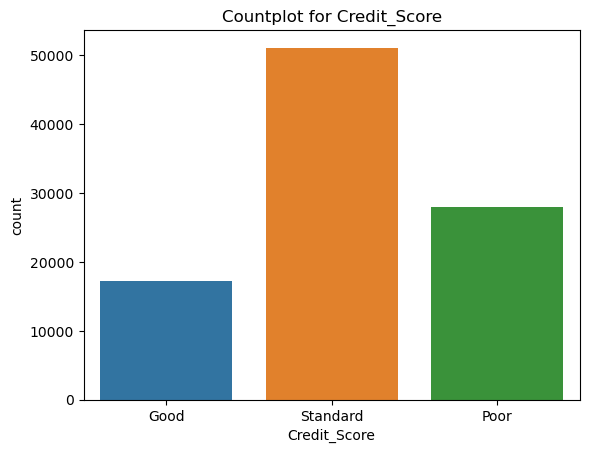

In [124]:
#To display countplot of Credit_Score
sns.countplot(x=df['Credit_Score'])
plt.title('Countplot for Credit_Score')
plt.savefig('Credit_Score.png')
plt.show()

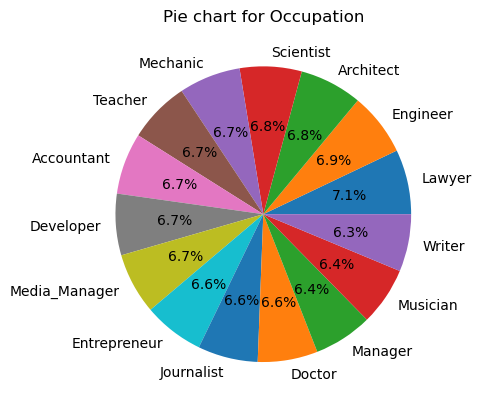

In [125]:
# Pie chart for Occupation

count = df['Occupation'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Occupation')
plt.savefig('Occupation.png')
plt.show()

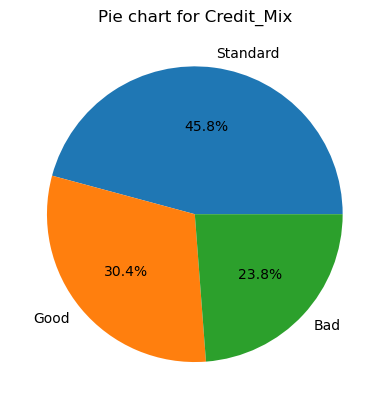

In [126]:
# Pie chart for Credit_Mix

count = df['Credit_Mix'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Credit_Mix')
plt.savefig('Credit_Mix.png')
plt.show()

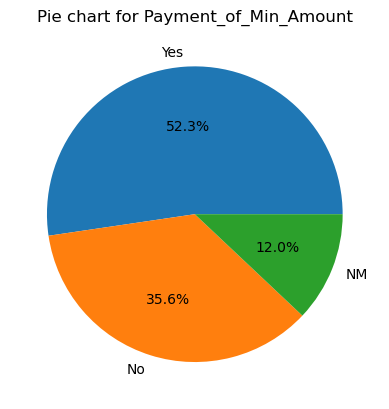

In [127]:
# Pie chart for Payment_of_Min_Amount

count = df['Payment_of_Min_Amount'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Payment_of_Min_Amount')
plt.savefig('Payment_of_Min_Amount.png')
plt.show()

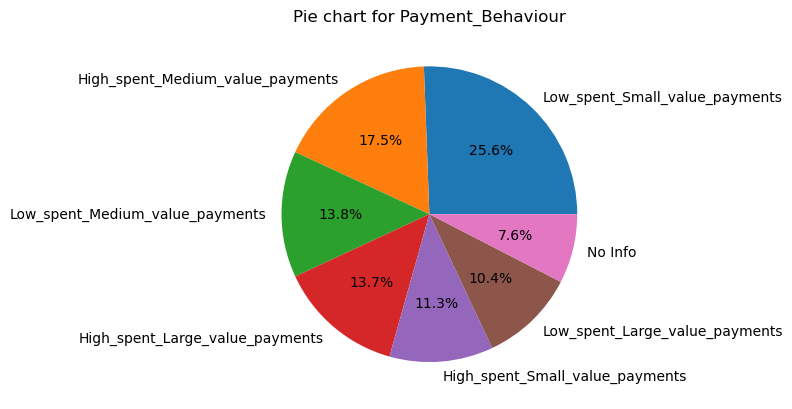

In [128]:
# Pie chart for Payment_Behaviour

count = df['Payment_Behaviour'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Payment_Behaviour')
plt.savefig('Payment_Behaviour.png')
plt.show()

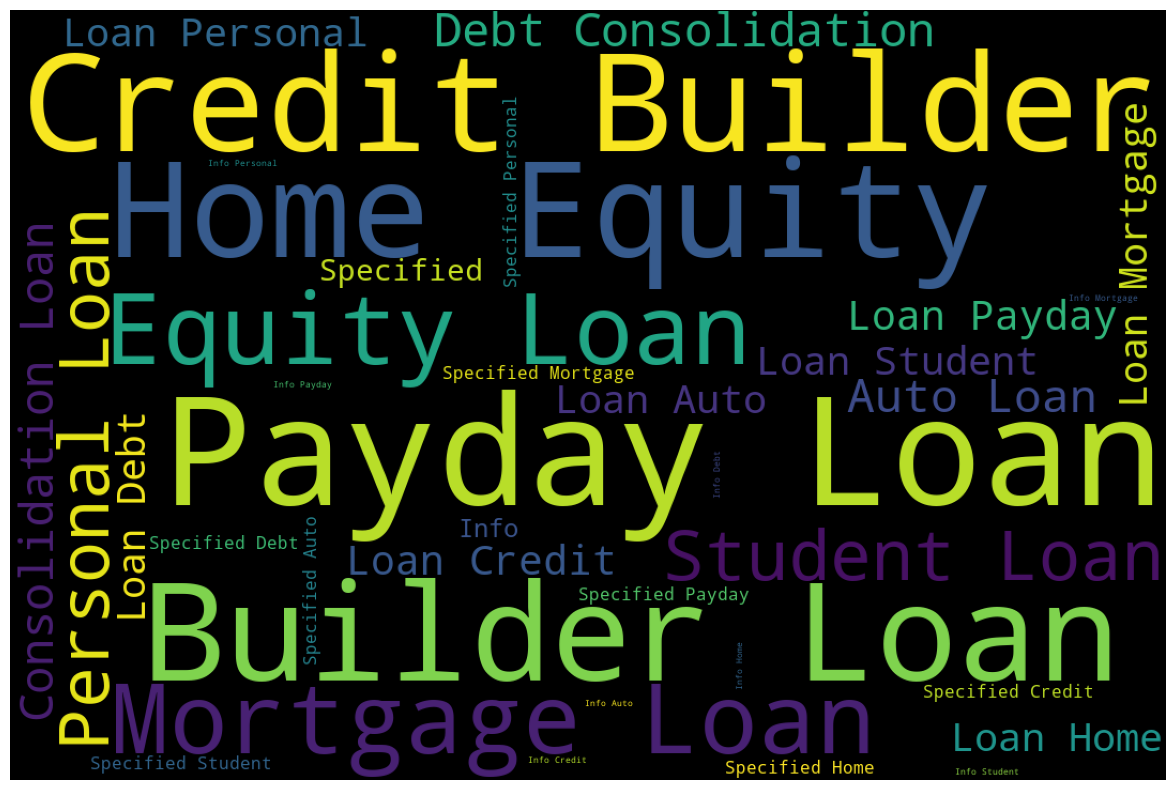

In [129]:
from wordcloud import WordCloud

words = ' '.join(df['Type_of_Loan'])

plt.figure(figsize=(25,10))
wc=WordCloud(width=1080,height=720).generate(words)
plt.imshow(wc)
plt.axis("off")
plt.savefig('Type_of_Loan.png')
plt.show()

In [130]:
# eda of numeric columns

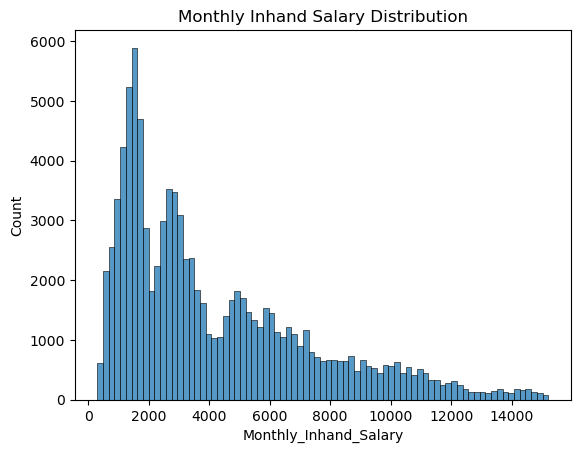

In [131]:
# To plot histogram for Monthly_Inhand_Salary
sns.histplot(x=df['Monthly_Inhand_Salary'], palette="light:b")
plt.title(f'Monthly Inhand Salary Distribution')
plt.savefig('Monthly_Inhand_Salary.png')
plt.show()

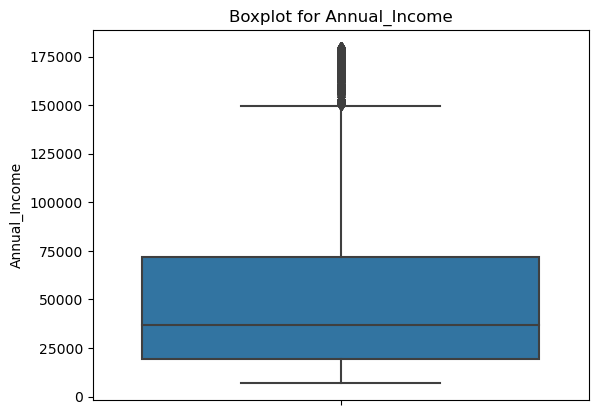

In [132]:
# To plot histogram for Annual_Income
sns.boxplot(y=df['Annual_Income'])
plt.title(f'Boxplot for Annual_Income')
plt.savefig('Annual_Income.png')
plt.show()

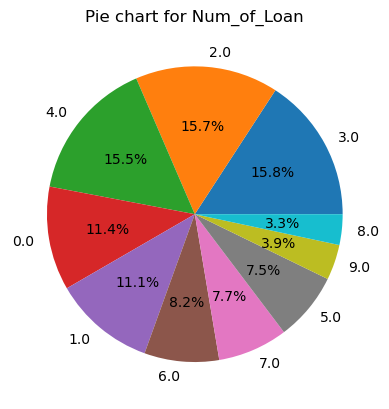

In [133]:
# Pie chart for Num_of_Loan

count = df['Num_of_Loan'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Num_of_Loan')
plt.savefig('Num_of_Loan.png')
plt.show()

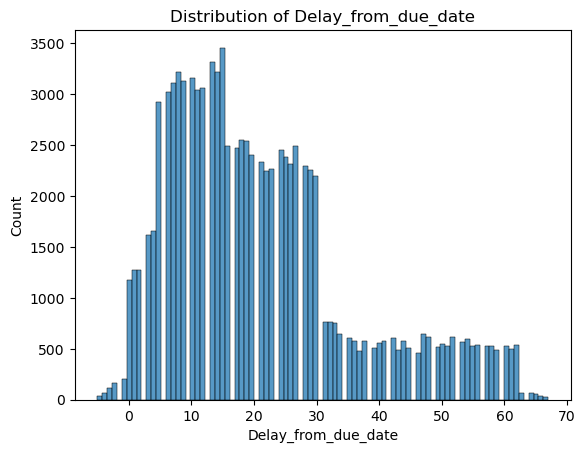

In [134]:
# To plot histogram for Delay_from_due_date
sns.histplot(x=df['Delay_from_due_date'], palette="light:b")
plt.title(f'Distribution of Delay_from_due_date')
plt.savefig('Delay_from_due_date.png')
plt.show()

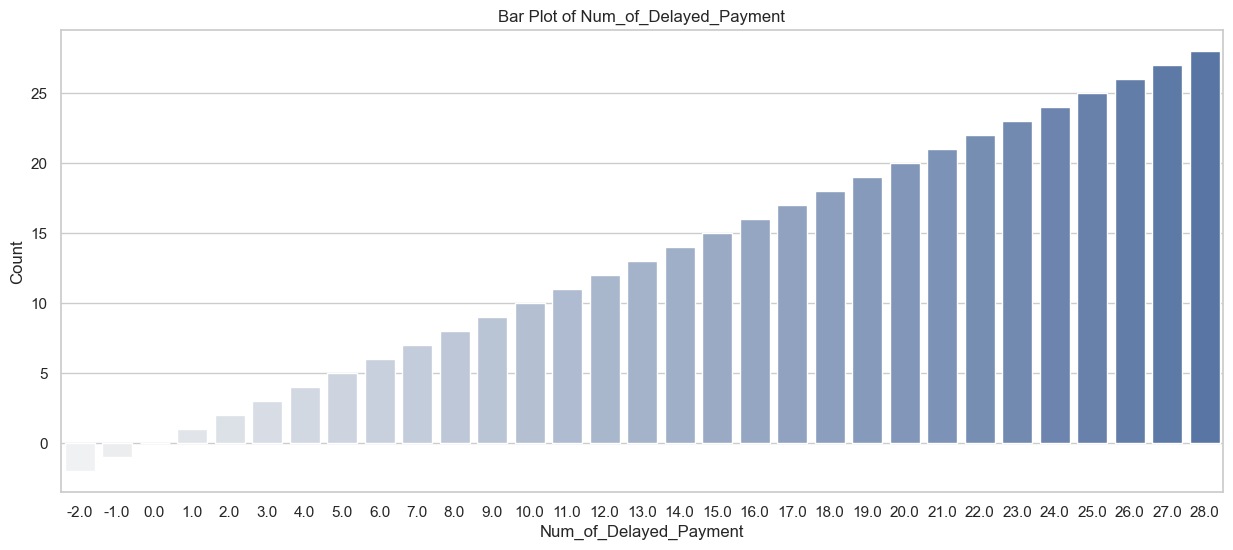

In [135]:
# Bar chart for Num_of_Delayed_Payment

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Num_of_Delayed_Payment'], y=df['Num_of_Delayed_Payment'], palette="light:b")
plt.xlabel("Num_of_Delayed_Payment")
plt.ylabel("Count")
plt.title("Bar Plot of Num_of_Delayed_Payment")
plt.savefig('Num_of_Delayed_Payment.png')
plt.show()

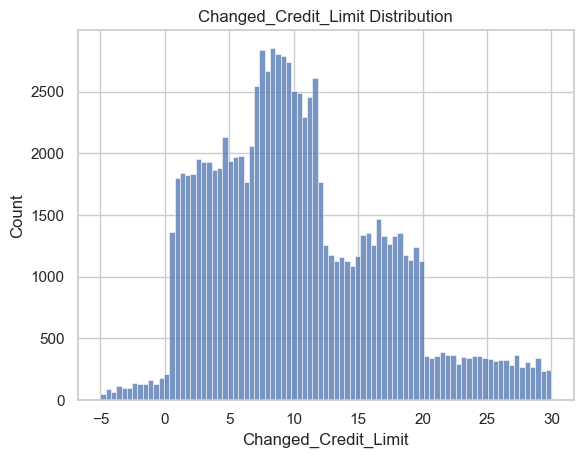

In [136]:
# To plot histogram for Changed_Credit_Limit
sns.histplot(x=df['Changed_Credit_Limit'], palette="light:b")
plt.title(f'Changed_Credit_Limit Distribution')
plt.savefig('Changed_Credit_Limit.png')
plt.show()

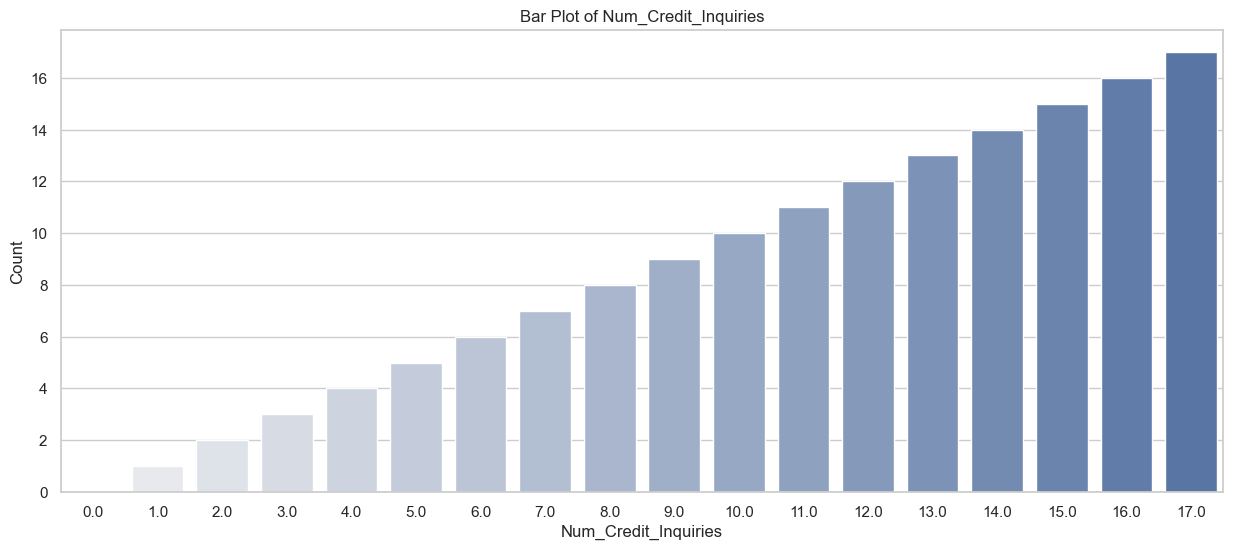

In [137]:
# Bar chart for Num_Credit_Inquiries

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Num_Credit_Inquiries'], y=df['Num_Credit_Inquiries'], palette="light:b")
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Count")
plt.title("Bar Plot of Num_Credit_Inquiries")
plt.savefig('Num_Credit_Inquiries.png')
plt.show()

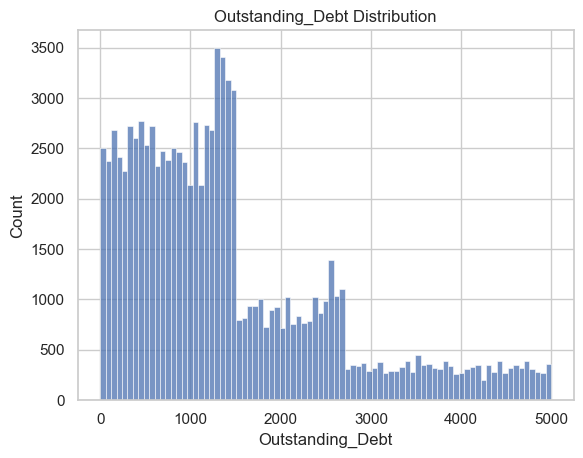

In [138]:
# To plot histogram for Outstanding_Debt
sns.histplot(x=df['Outstanding_Debt'], palette="light:b")
plt.title(f'Outstanding_Debt Distribution')
plt.savefig('Outstanding_Debt.png')
plt.show()

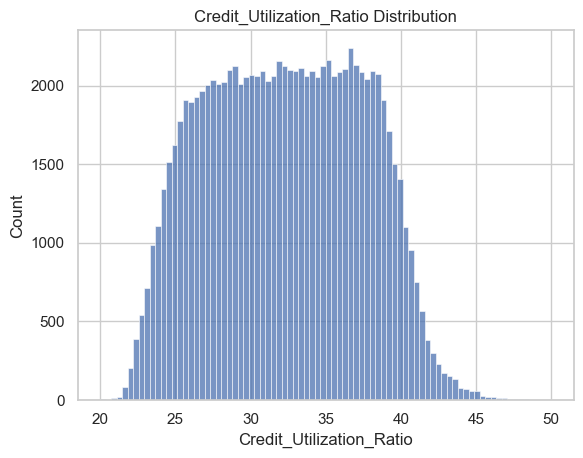

In [139]:
# To plot histogram for Credit_Utilization_Ratio
sns.histplot(x=df['Credit_Utilization_Ratio'], palette="light:b")
plt.title(f'Credit_Utilization_Ratio Distribution')
plt.savefig('Credit_Utilization_Ratio.png')
plt.show()

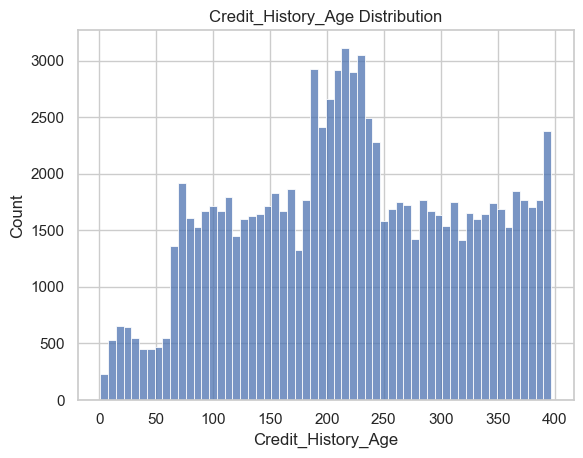

In [140]:
# To plot histogram for Credit_History_Age
sns.histplot(x=df['Credit_History_Age'], palette="light:b")
plt.title(f'Credit_History_Age Distribution')
plt.savefig('Credit_History_Age.png')
plt.show()

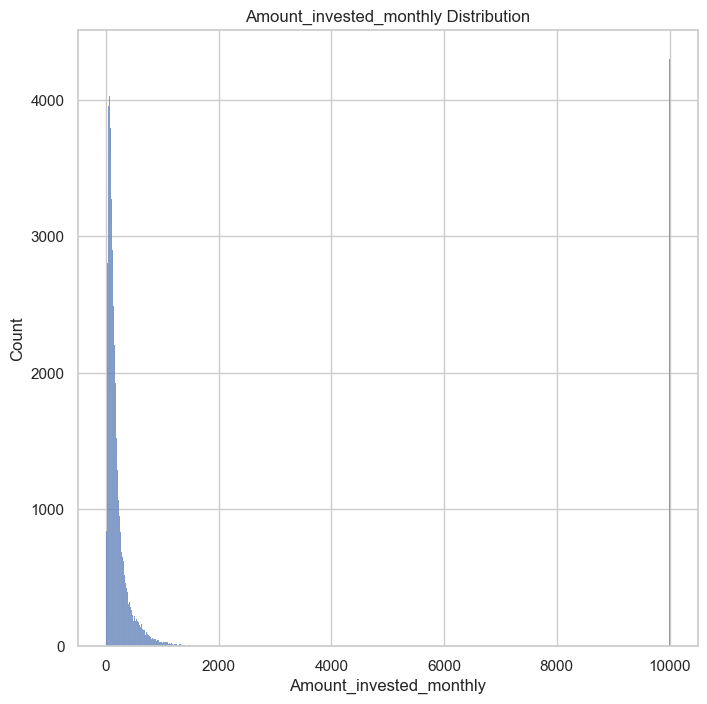

In [141]:
# To plot histogram for Amount_invested_monthly
plt.figure(figsize=(8, 8))
sns.histplot(df['Amount_invested_monthly'])
plt.title(f'Amount_invested_monthly Distribution')
plt.savefig('Amount_invested_monthly.png')
plt.show()

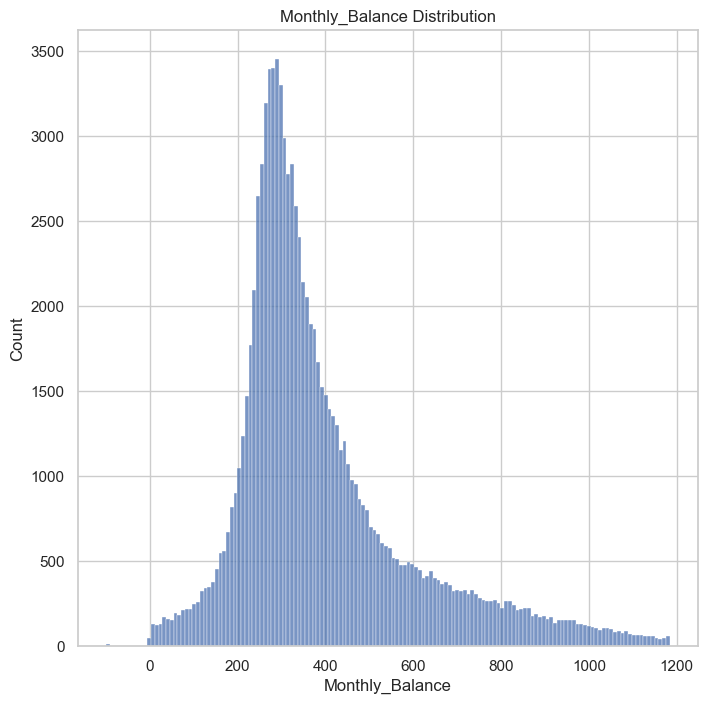

In [142]:
# To plot histogram for Monthly_Balance
plt.figure(figsize=(8, 8))
sns.histplot(df['Monthly_Balance'], palette="light:b")
plt.title(f'Monthly_Balance Distribution')
plt.savefig('Monthly_Balance.png')
plt.show()

In [143]:
# BiVariate Analysis

In [144]:
# Visualizing chart between categorical columns and Credit_Score
cat_cols

Index(['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

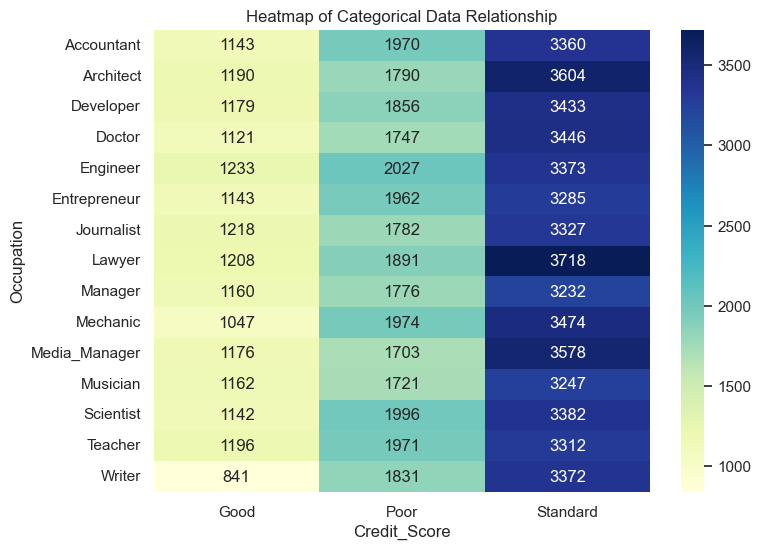

In [145]:
# To plot table to compare Occupation with Credit_Score

plt.figure(figsize=(8, 6))
crosstab = pd.crosstab(df['Occupation'], df['Credit_Score'])
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Credit_Score')
plt.ylabel('Occupation')
plt.title('Heatmap of Categorical Data Relationship')
plt.savefig('OccupationVSCredit_Score.png')
plt.show()

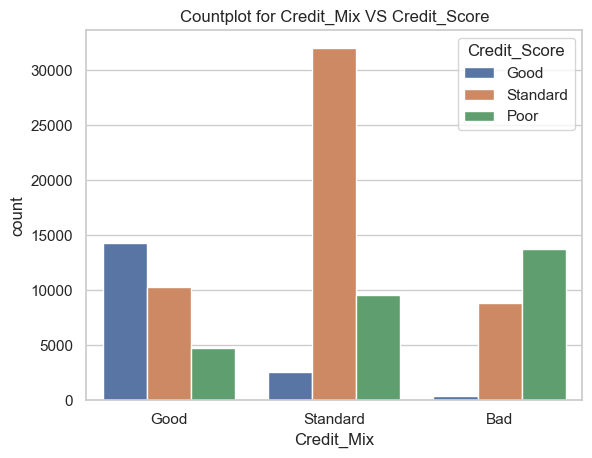

In [146]:
# Distribution of Credit_Mix with respect to Credit_Score
sns.countplot(x=df['Credit_Mix'],hue=df['Credit_Score'])
plt.title(f'Countplot for Credit_Mix VS Credit_Score')
plt.savefig('Credit_MixVSCredit_Score.png')
plt.show()

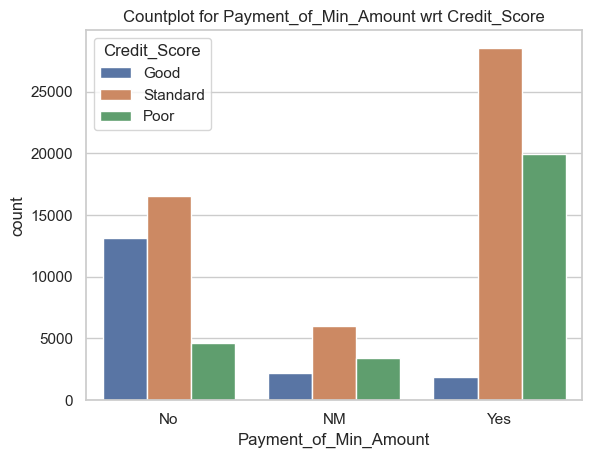

In [147]:
# Distribution of Payment_of_Min_Amount with respect to Credit_Score
sns.countplot(x=df['Payment_of_Min_Amount'],hue=df['Credit_Score'])
plt.title(f'Countplot for Payment_of_Min_Amount wrt Credit_Score')
plt.savefig('Payment_of_Min_AmountVSCredit_Score.png')
plt.show()

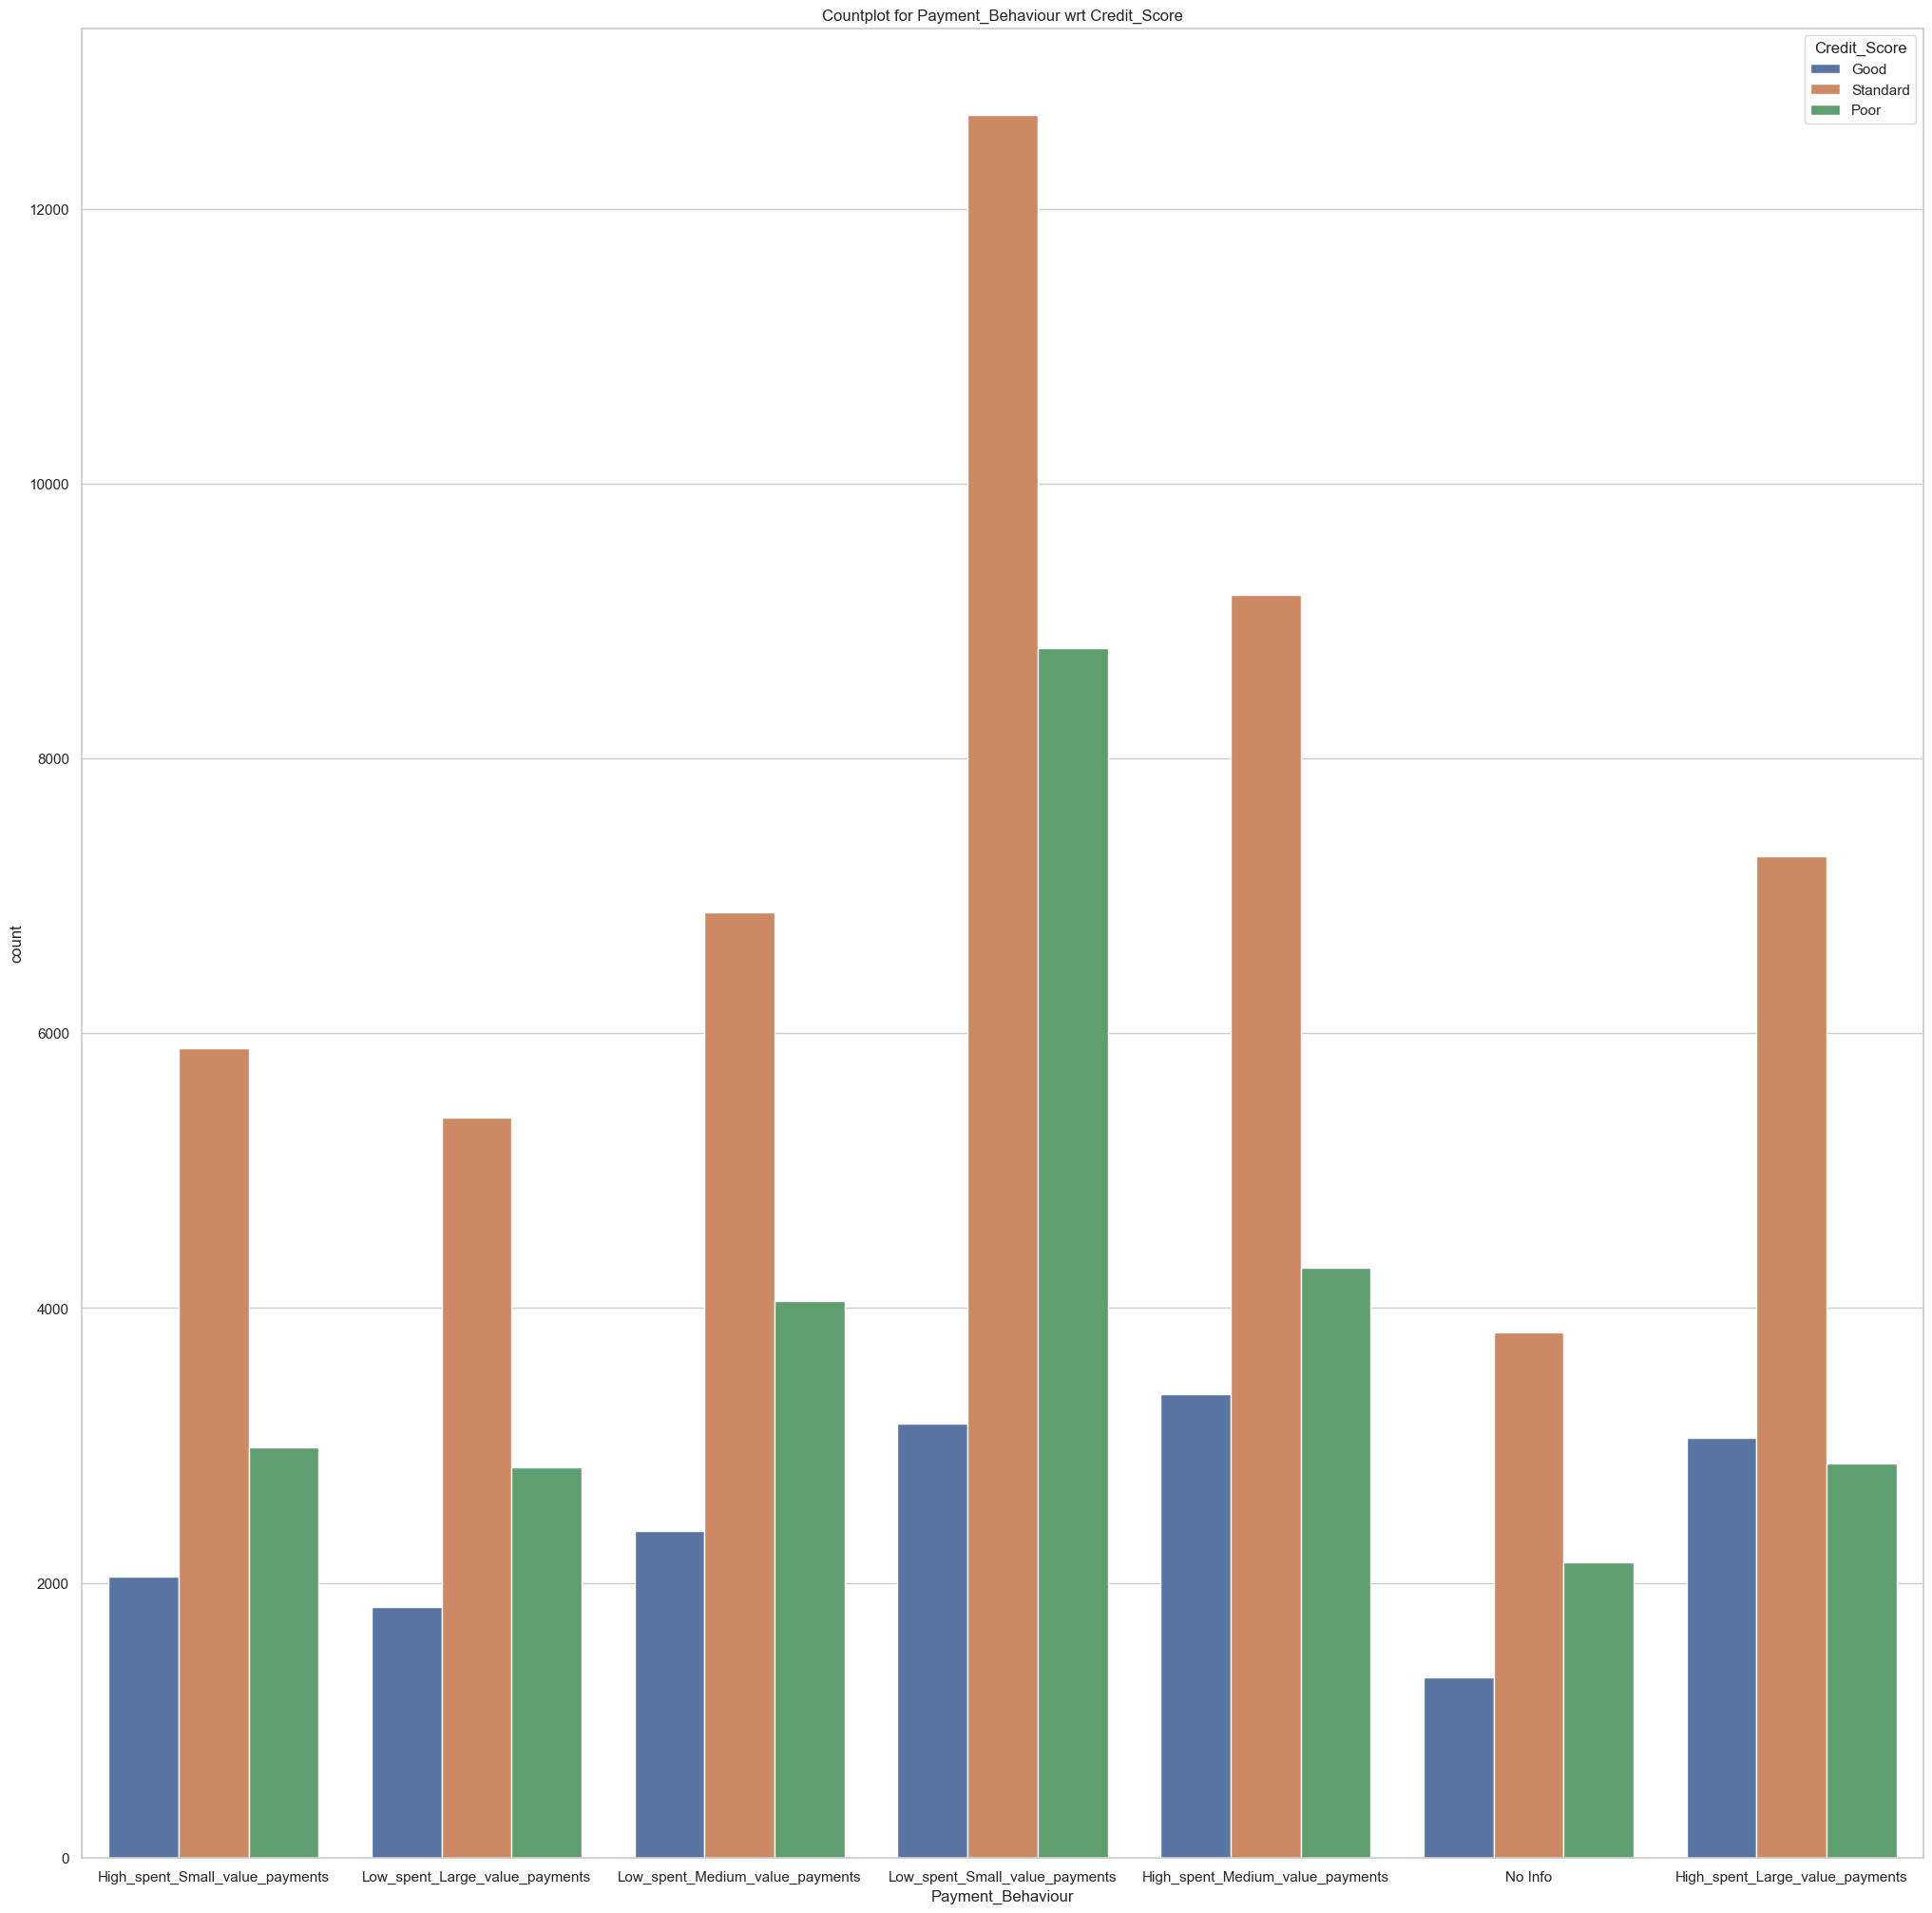

In [148]:
# Distribution of Payment_Behaviour with respect to Credit_Score

plt.figure(figsize=(25,25))
sns.countplot(x=df['Payment_Behaviour'],hue=df['Credit_Score'])
plt.title(f'Countplot for Payment_Behaviour wrt Credit_Score')
plt.savefig('Payment_BehaviourVSCredit_Score.png')
plt.show()

In [149]:
# Visualizing chart between numeric columns and Credit_Score
num_cols

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

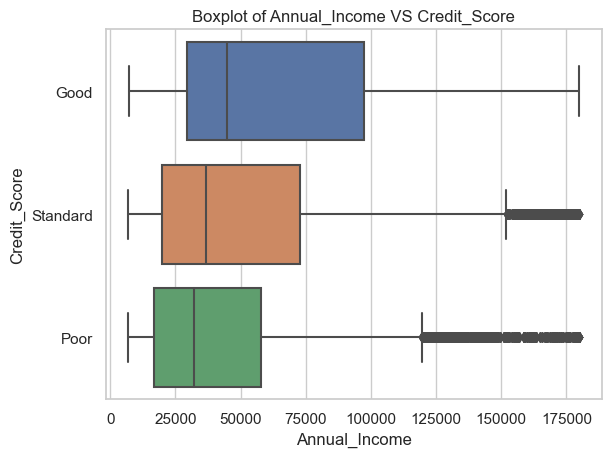

In [150]:
#To display box plot between Annual_Income and Credit_Score
sns.boxplot(x=df['Annual_Income'],y=df['Credit_Score'])
plt.title(f'Boxplot of Annual_Income VS Credit_Score')
plt.savefig('Annual_IncomeVSCredit_Score.png')
plt.show()

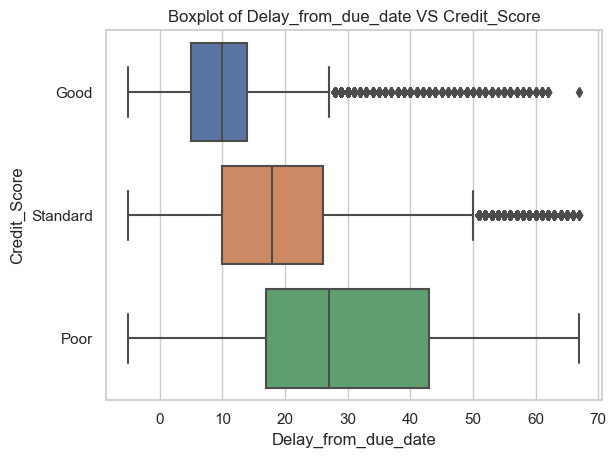

In [151]:
#To display box plot between Delay_from_due_date and Credit_Score
sns.boxplot(x=df['Delay_from_due_date'],y=df['Credit_Score'])
plt.title(f'Boxplot of Delay_from_due_date VS Credit_Score')
plt.savefig('Delay_from_due_dateVSCredit_Score.png')
plt.show()

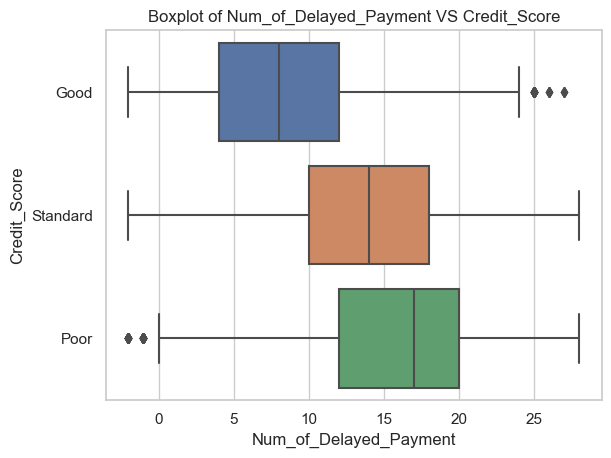

In [152]:
#To display box plot between Num_of_Delayed_Payment and Credit_Score
sns.boxplot(x=df['Num_of_Delayed_Payment'],y=df['Credit_Score'])
plt.title(f'Boxplot of Num_of_Delayed_Payment VS Credit_Score')
plt.savefig('Num_of_Delayed_PaymentVSCredit_Score.png')
plt.show()

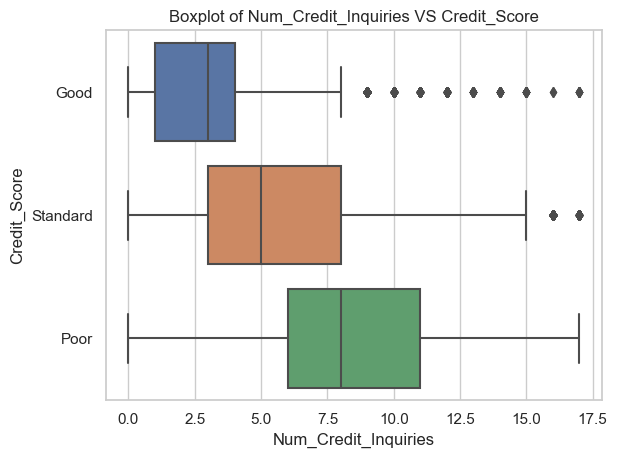

In [153]:
#To display box plot between Num_Credit_Inquiries and Credit_Score
sns.boxplot(x=df['Num_Credit_Inquiries'],y=df['Credit_Score'])
plt.title(f'Boxplot of Num_Credit_Inquiries VS Credit_Score')
plt.savefig('Num_Credit_InquiriesVSCredit_Score.png')
plt.show()

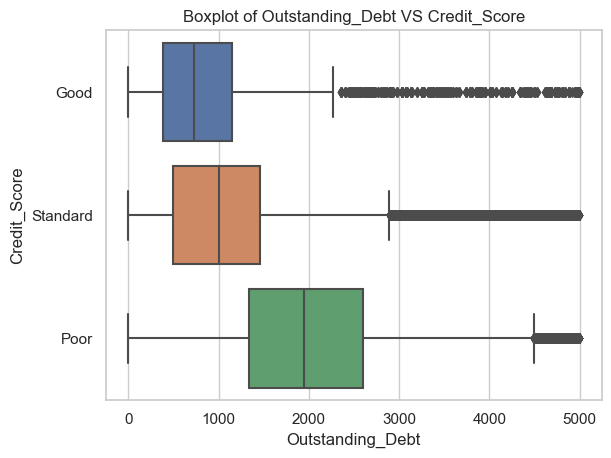

In [154]:
#To display box plot between Num_CredOutstanding_Debtit_Inquiries and Credit_Score
sns.boxplot(x=df['Outstanding_Debt'],y=df['Credit_Score'])
plt.title(f'Boxplot of Outstanding_Debt VS Credit_Score')
plt.savefig('Outstanding_DebtVSCredit_Score.png')
plt.show()

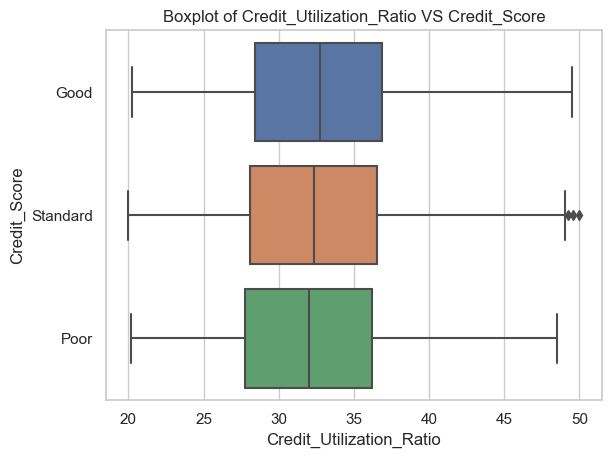

In [155]:
#To display box plot between Credit_Utilization_Ratio and Credit_Score
sns.boxplot(x=df['Credit_Utilization_Ratio'],y=df['Credit_Score'])
plt.title(f'Boxplot of Credit_Utilization_Ratio VS Credit_Score')
plt.savefig('Credit_Utilization_RatioVSCredit_Score.png')
plt.show()

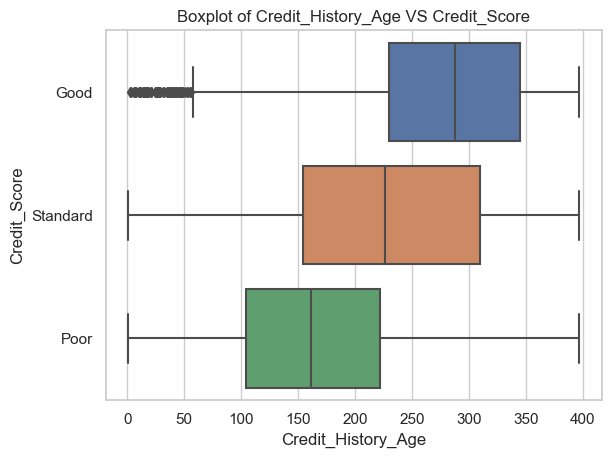

In [156]:
#To display box plot between Credit_History_Age and Credit_Score
sns.boxplot(x=df['Credit_History_Age'],y=df['Credit_Score'])
plt.title(f'Boxplot of Credit_History_Age VS Credit_Score')
plt.savefig('Credit_History_AgeVSCredit_Score.png')
plt.show()

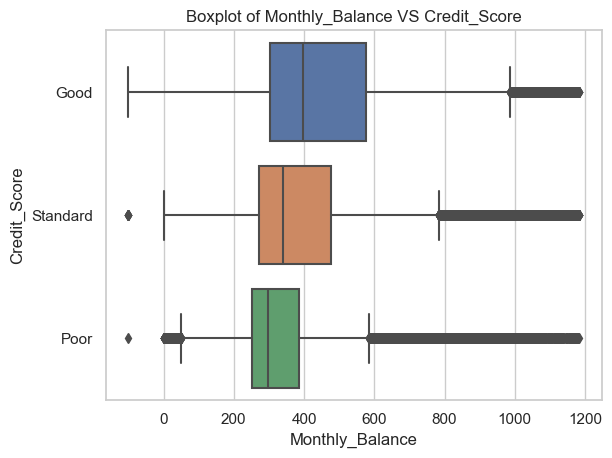

In [157]:
#To display box plot between Monthly_Balance and Credit_Score
sns.boxplot(x=df['Monthly_Balance'],y=df['Credit_Score'])
plt.title(f'Boxplot of Monthly_Balance VS Credit_Score')
plt.savefig('Monthly_BalanceVSCredit_Score.png')
plt.show()

In [158]:
# MultiVAriate Analysis

In [159]:
df.Credit_Score = df.Credit_Score.replace({'Poor':0, 'Standard':1, 'Good':2})

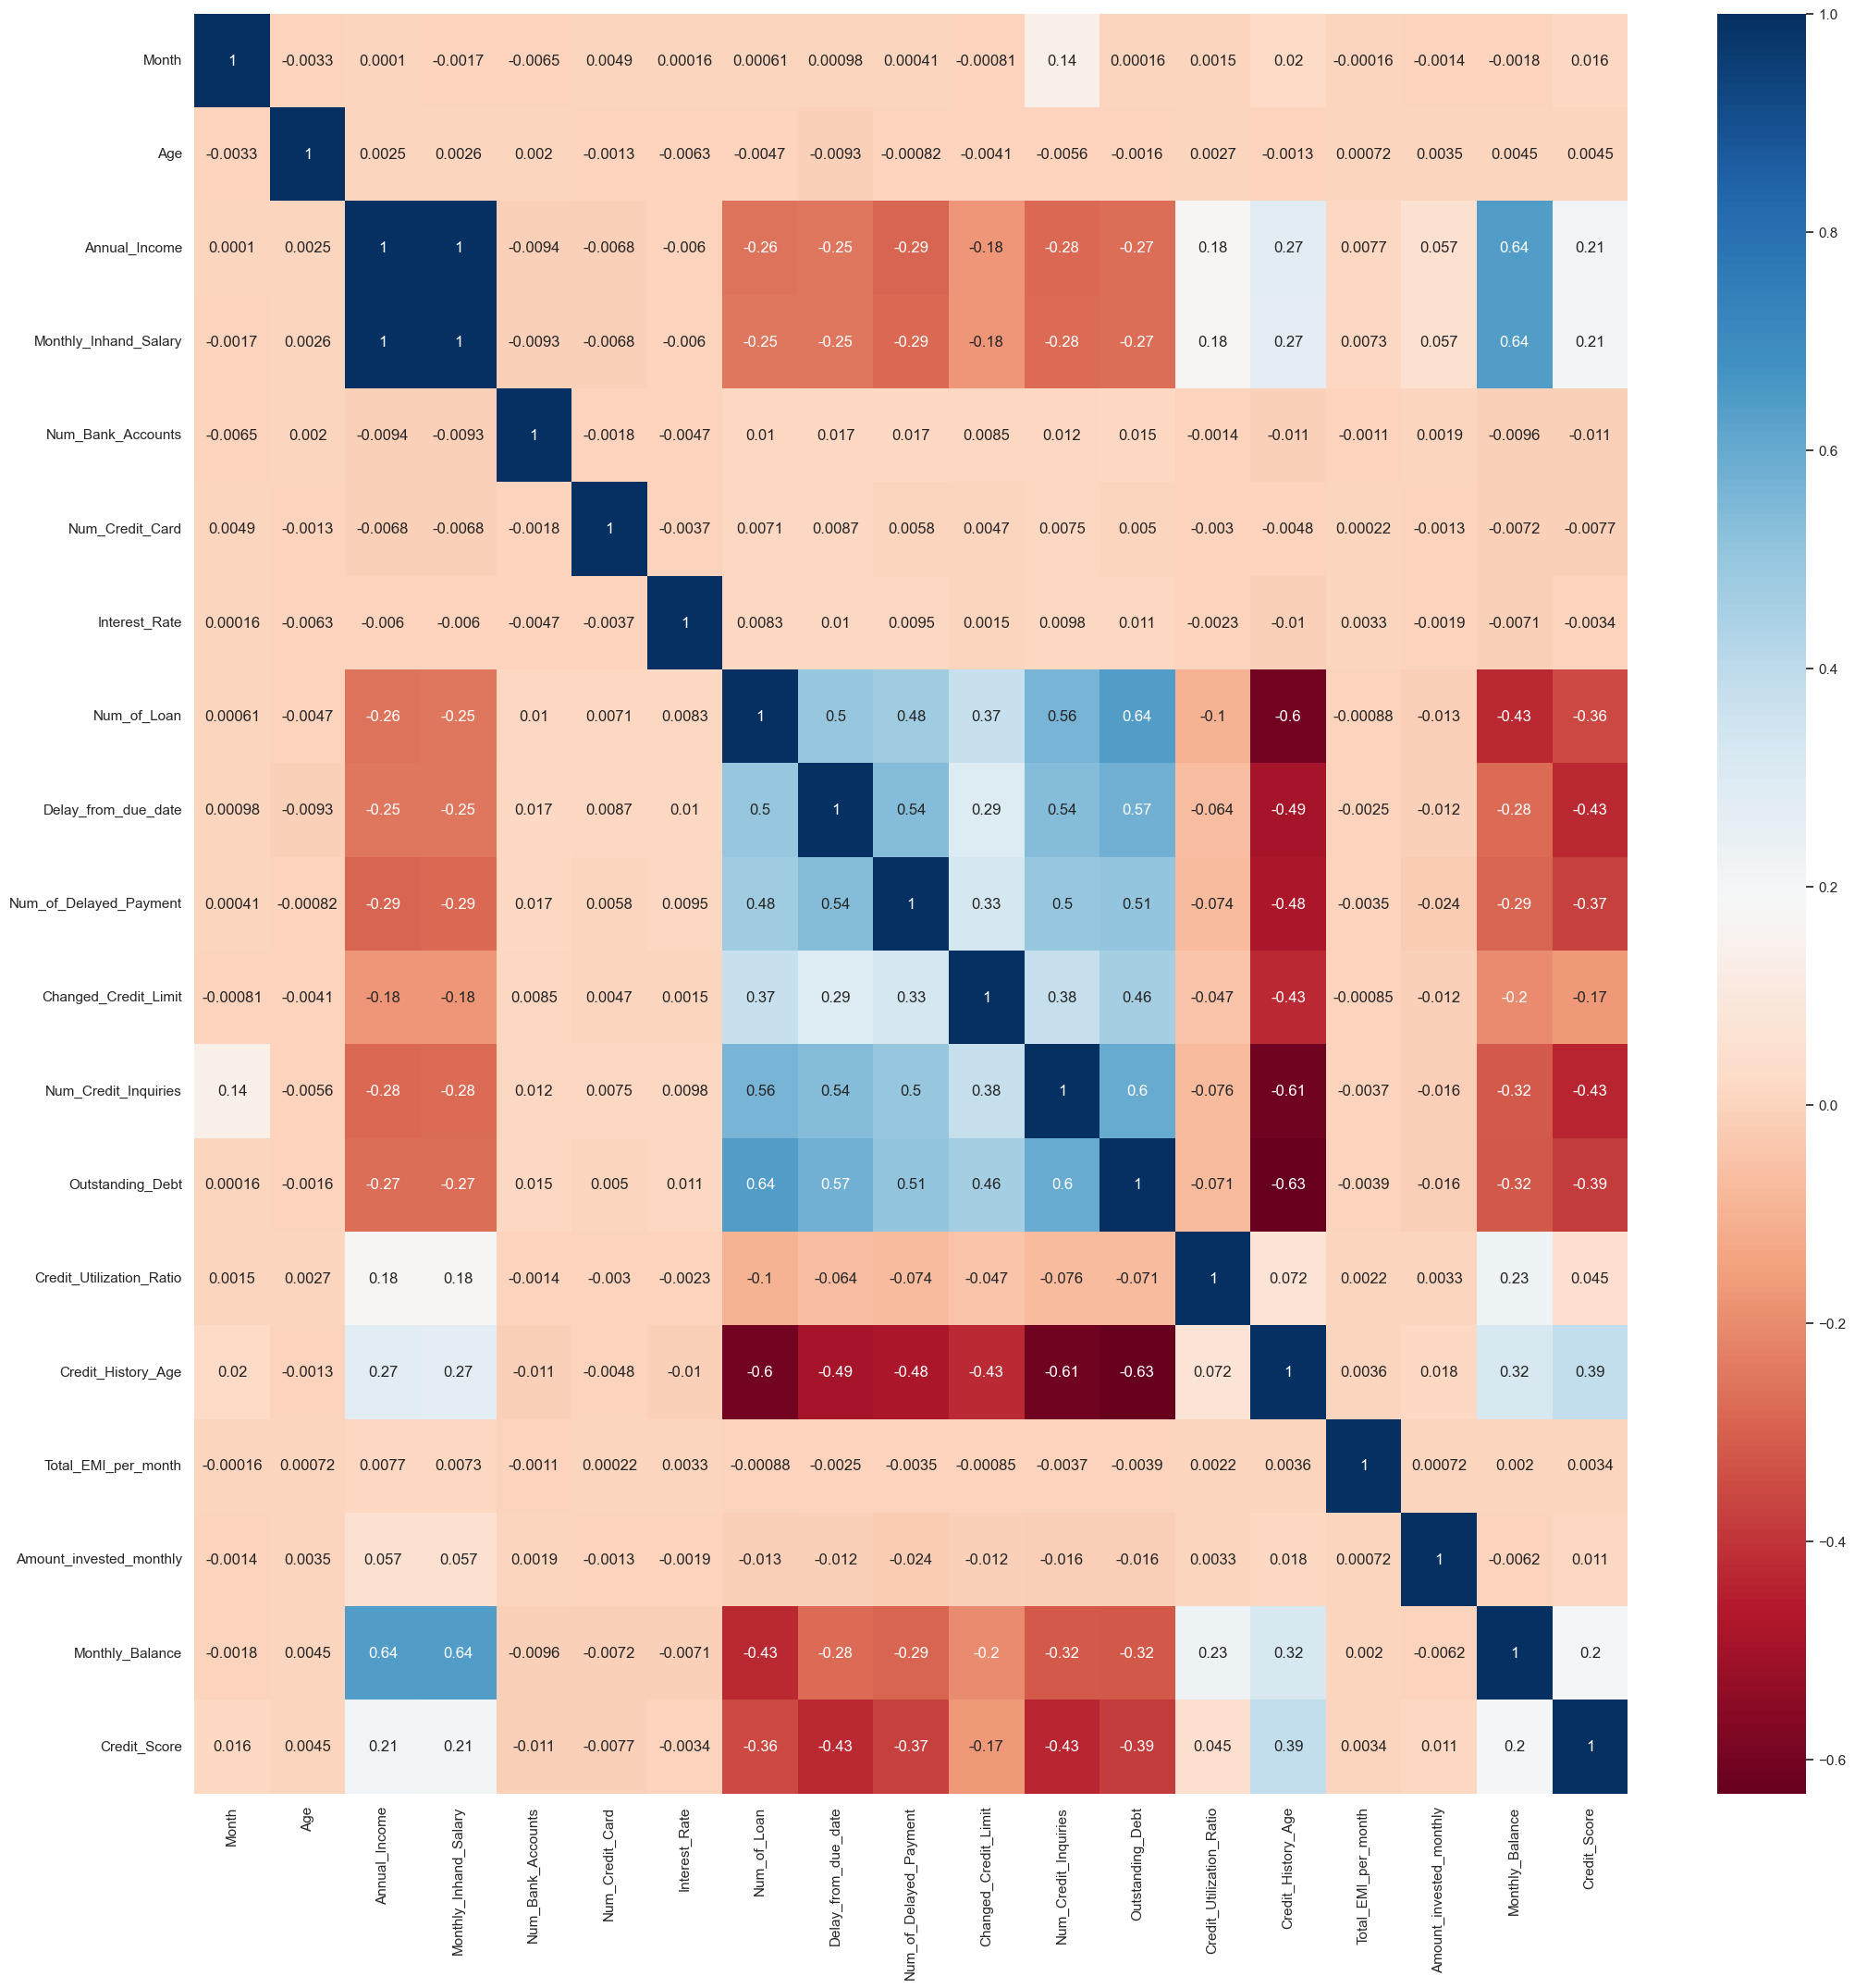

In [160]:
#To display correlation between different numeric columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.savefig('CorrelationMatrix.png')
plt.show()

In [161]:
# Feature Engineering

In [162]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415,High_spent_Small_value_payments,312.494089,2
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280,Low_spent_Large_value_payments,284.629163,2
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.700,Low_spent_Medium_value_payments,331.209863,2
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458,Low_spent_Small_value_payments,223.451310,2
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420,High_spent_Medium_value_payments,341.489231,2


In [163]:
# As Annual_Income and Monthly_Inhand_Salary are highly correlated, removing Annual_Income column
df.drop('Annual_Income',axis=1,inplace=True)

In [164]:
# Removing columns that will not affect the model
df.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

In [165]:
# Applying log to the left skewed column Amount_invested_monthly

df['Log_Amount_invested_monthly'] = np.log1p(df['Amount_invested_monthly'])
df.drop('Amount_invested_monthly',axis=1,inplace=True)

In [166]:
df['EMI_to_inhand_Percentage']= df['Total_EMI_per_month']/df['Monthly_Inhand_Salary']*100
df.drop(['Total_EMI_per_month', 'Monthly_Inhand_Salary'], axis=1, inplace=True)

In [167]:
# Encoding categorical Columns

In [168]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')
Index(['Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Monthly_Balance',
       'Credit_Score', 'Log_Amount_invested_monthly',
       'EMI_to_inhand_Percentage'],
      dtype='object')


In [169]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in ['Occupation', 'Type_of_Loan']:
    df[i] = lb.fit_transform(df[i])

In [170]:
df.Credit_Mix= df.Credit_Mix.replace({'Bad':0, 'Standard':1, 'Good':2})

df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.replace({'NM':0, 'No':1, 'Yes':2})

df.Payment_Behaviour = df.Payment_Behaviour.replace({'No Info':0, 'Low_spent_Small_value_payments':1,
                                                     'Low_spent_Medium_value_payments':2, 'Low_spent_Large_value_payments':3,
                                                     'High_spent_Small_value_payments':4, 'High_spent_Medium_value_payments':5,
                                                     'High_spent_Large_value_payments':6})

In [171]:
# Model building

In [172]:
# Creating Function to evalute the model performance

In [173]:
def eval_model(model,x_train,x_test,y_train,y_test, save=True):
    global train_score, test_score, precision, recall, f1

    modelname= type(model).__name__
    model.fit(x_train,y_train)
    train_score = round(model.score(x_train,y_train),2)
    test_score = round(model.score(x_test,y_test),2)
    y_pred = model.predict(x_test)

    precision = np.around(precision_score(y_test, y_pred, average=None), decimals=2)
    recall = np.around(recall_score(y_test, y_pred, average=None), decimals=2)
    f1 = np.around(f1_score(y_test, y_pred, average=None), decimals=2)

    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')

    print('precision Score is:', precision)
    print('Recall Score is:', recall)
    print('F1 Score is:', f1)

    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    if save:
        save_cm= f'{modelname}confusionMatrix.png'
        plt.savefig(save_cm)
    else:
        plt.show()

In [174]:
def plot_roc_auc(model, x_test, y_test, save=True):
    modelname= type(model).__name__

    y_pred_proba = model.predict_proba(x_test)
    n_classes = y_pred_proba.shape[1]

    plt.figure(figsize=(8, 6))
    for class_index in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_proba[:, class_index])
        auc = roc_auc_score(y_test == class_index, y_pred_proba[:, class_index])
        plt.plot(fpr, tpr, label=f'Class {class_index} (AUC = {auc:.2f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve (Multi-Class)')
    plt.legend()

    if save:
        roc_image= f'{modelname}RocAucCurve.png'
        plt.savefig(roc_image)
    else:
        plt.show()

In [175]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'Precision Score',
                                   'Recall Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score,
                                    'Test Score': test_score, 'Precision Score': precision,
                                    'Recall Score': recall, 'f1-score': f1}, ignore_index = True)
    return(score_card)

In [176]:
#Select the Dependent and Independent Features
x = df.drop('Credit_Score',axis=1)
y = df['Credit_Score']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(96299, 21) (96299,)


In [177]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67409, 21)
(28890, 21)
(67409,)
(28890,)


In [178]:
# Logistic Regression


Training Score is: 63.0 %
Testing Score is: 62.0 %

precision Score is: [0.64 0.65 0.51]
Recall Score is: [0.47 0.74 0.52]
F1 Score is: [0.55 0.69 0.52]

Confusion Matrix is
 [[ 3981  3827   599]
 [ 2088 11276  1964]
 [  113  2365  2677]]

Predictions:
 [1 2 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.64      0.47      0.55      8407
           1       0.65      0.74      0.69     15328
           2       0.51      0.52      0.52      5155

    accuracy                           0.62     28890
   macro avg       0.60      0.58      0.58     28890
weighted avg       0.62      0.62      0.62     28890



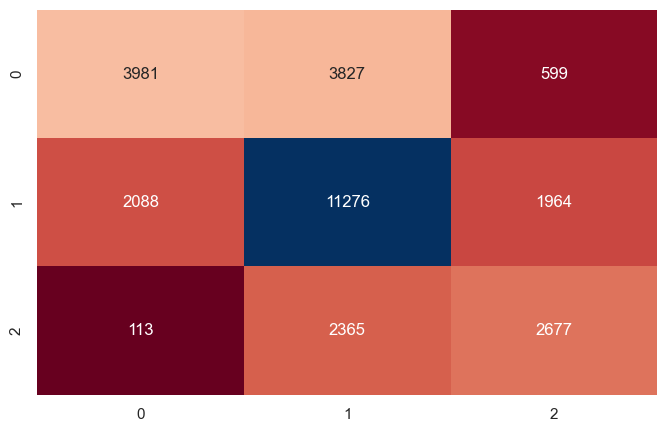

In [179]:
lr = LogisticRegression(multi_class='multinomial', max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

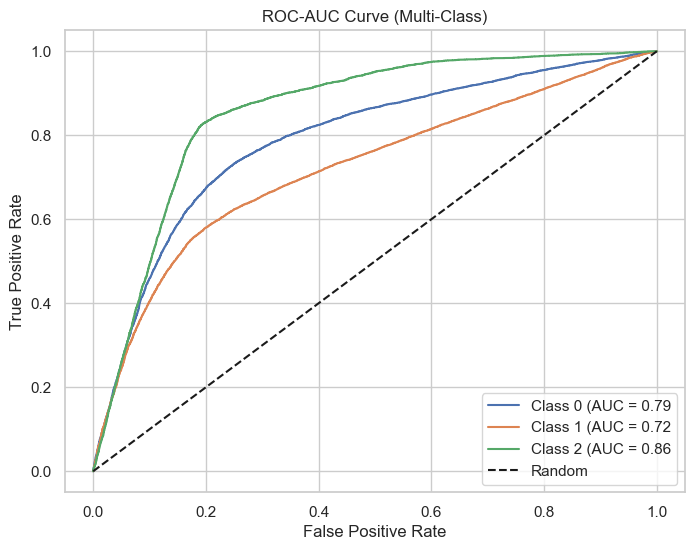

In [180]:
plot_roc_auc(lr, x_test, y_test)

In [181]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"


In [182]:
# Logistic Regression (using SGD)


Training Score is: 45.0 %
Testing Score is: 45.0 %

precision Score is: [0.59 0.71 0.29]
Recall Score is: [0.53 0.26 0.88]
F1 Score is: [0.56 0.38 0.43]

Confusion Matrix is
 [[4465 1175 2767]
 [2895 3968 8465]
 [ 228  415 4512]]

Predictions:
 [2 2 0 ... 2 0 1]
              precision    recall  f1-score   support

           0       0.59      0.53      0.56      8407
           1       0.71      0.26      0.38     15328
           2       0.29      0.88      0.43      5155

    accuracy                           0.45     28890
   macro avg       0.53      0.56      0.46     28890
weighted avg       0.60      0.45      0.44     28890



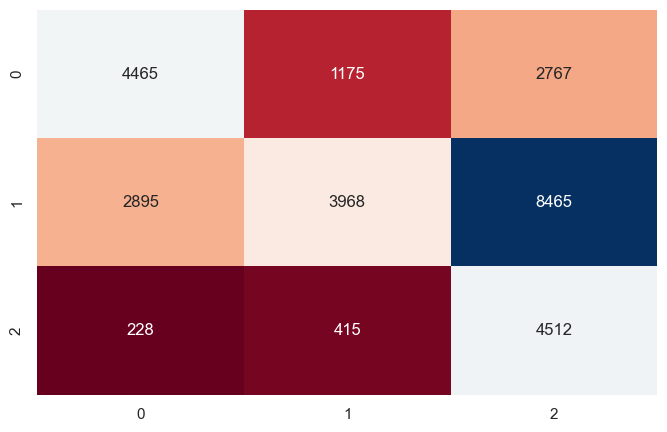

In [183]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

In [184]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"


In [185]:
# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 70.0 %

precision Score is: [0.68 0.73 0.63]
Recall Score is: [0.68 0.73 0.63]
F1 Score is: [0.68 0.73 0.63]

Confusion Matrix is
 [[ 5680  2466   261]
 [ 2439 11242  1647]
 [  270  1617  3268]]

Predictions:
 [0 2 0 ... 2 1 1]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      8407
           1       0.73      0.73      0.73     15328
           2       0.63      0.63      0.63      5155

    accuracy                           0.70     28890
   macro avg       0.68      0.68      0.68     28890
weighted avg       0.70      0.70      0.70     28890



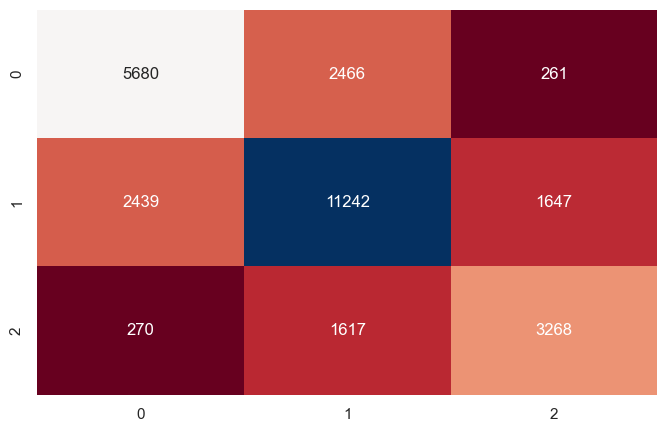

In [186]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

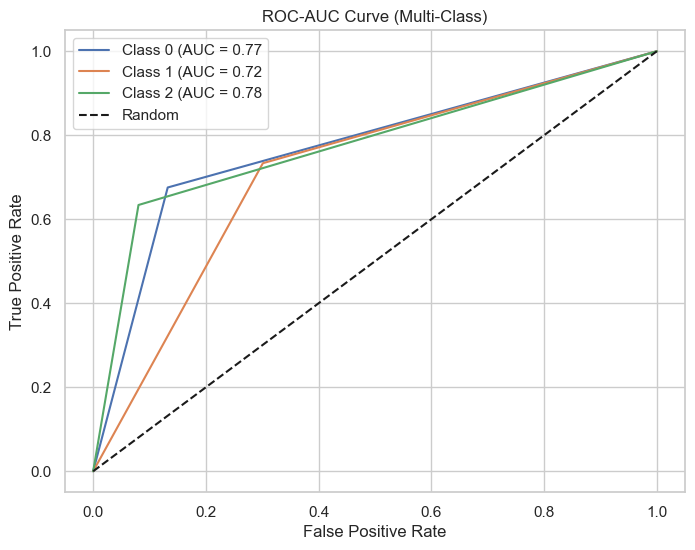

In [187]:
plot_roc_auc(dt1, x_test, y_test)

In [188]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"


In [189]:
# Decision Tree with Pruning

In [190]:
# hparams = {'criterion':['gini','entropy','log_loss'],
#           'max_depth':[8,9,10,11,12,14],
#           'min_samples_split':[8,10,12,14,15,16,20]}

# dt_rs = DecisionTreeClassifier()
# rscv = RandomizedSearchCV(dt_rs,param_distributions=hparams,scoring='accuracy',n_iter=20)
# rscv.fit(x_train,y_train)

In [191]:
# print(rscv.best_params_)
# print(rscv.best_estimator_)
# print(rscv.best_index_)
# print(rscv.best_score_)

In [192]:
# tuned_paramaters = [ {'criterion':['entropy'],'max_depth':[9,10,11],
# 'min_samples_split':[10,12,14]}]

# dt_CV= DecisionTreeClassifier(random_state = 10)

# grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

# dt_grid = grid.fit(x_train, y_train)

# print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')


Training Score is: 74.0 %
Testing Score is: 71.0 %

precision Score is: [0.74 0.74 0.6 ]
Recall Score is: [0.64 0.77 0.65]
F1 Score is: [0.69 0.75 0.62]

Confusion Matrix is
 [[ 5408  2506   493]
 [ 1763 11820  1745]
 [  125  1682  3348]]

Predictions:
 [0 2 0 ... 2 1 1]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      8407
           1       0.74      0.77      0.75     15328
           2       0.60      0.65      0.62      5155

    accuracy                           0.71     28890
   macro avg       0.69      0.69      0.69     28890
weighted avg       0.71      0.71      0.71     28890



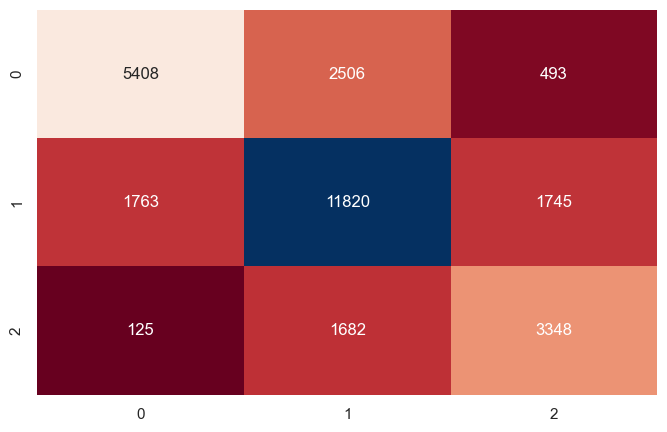

In [193]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_split=10)
eval_model(dt2,x_train,x_test,y_train,y_test)

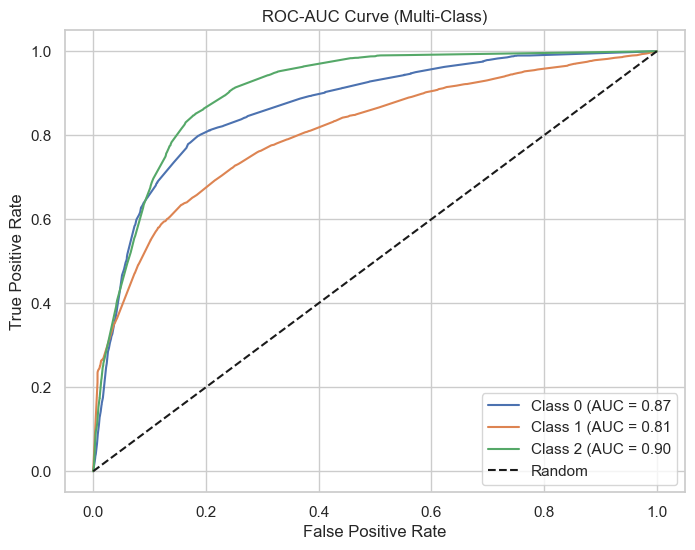

In [194]:
plot_roc_auc(dt2, x_test, y_test)

In [195]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"


In [196]:
# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 80.0 %

precision Score is: [0.79 0.83 0.76]
Recall Score is: [0.81 0.81 0.76]
F1 Score is: [0.8  0.82 0.76]

Confusion Matrix is
 [[ 6844  1414   149]
 [ 1756 12462  1110]
 [   43  1211  3901]]

Predictions:
 [0 2 0 ... 2 1 0]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      8407
           1       0.83      0.81      0.82     15328
           2       0.76      0.76      0.76      5155

    accuracy                           0.80     28890
   macro avg       0.79      0.79      0.79     28890
weighted avg       0.80      0.80      0.80     28890



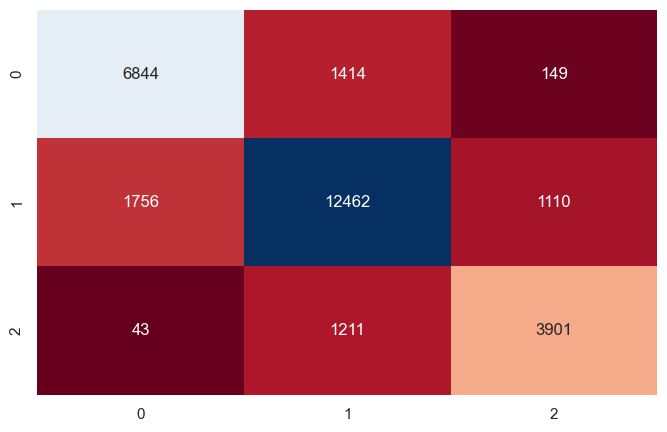

In [197]:
rf1 = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf1,x_train,x_test,y_train,y_test)

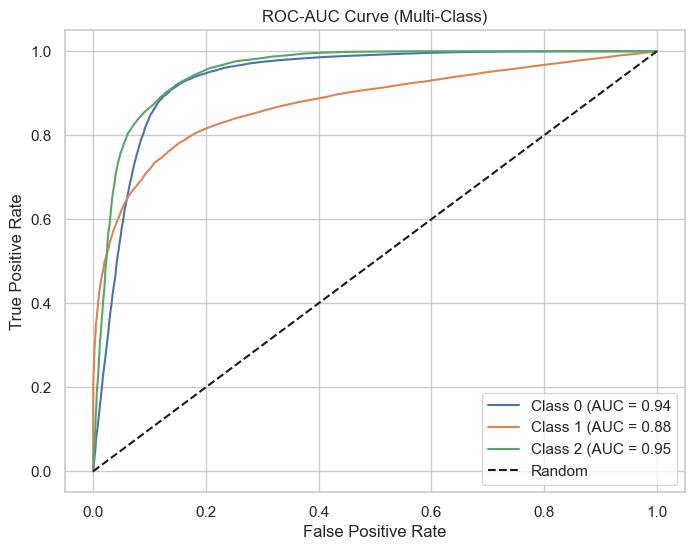

In [198]:
plot_roc_auc(rf1, x_test, y_test)

In [199]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"


In [200]:
# hparams = {'n_estimators': [180, 200, 220], 'min_samples_split': [10, 15, 20],
#            'max_depth': [8, 10, 12], 'min_samples_leaf': [10, 15, 20],
#            'max_leaf_nodes': [80, 100, 120] }

# rf_rs = RandomForestClassifier()
# rscv = RandomizedSearchCV(rf_rs,param_distributions=hparams,scoring='accuracy',n_iter=20)
# rscv.fit(x_train,y_train)

In [201]:
# print(rscv.best_params_)
# print(rscv.best_estimator_)
# print(rscv.best_index_)
# print(rscv.best_score_)

In [202]:
# Random Forest with Tuning


Training Score is: 72.0 %
Testing Score is: 71.0 %

precision Score is: [0.75 0.77 0.57]
Recall Score is: [0.65 0.74 0.74]
F1 Score is: [0.7  0.75 0.64]

Confusion Matrix is
 [[ 5461  2236   710]
 [ 1740 11392  2196]
 [   97  1260  3798]]

Predictions:
 [0 2 0 ... 2 1 1]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      8407
           1       0.77      0.74      0.75     15328
           2       0.57      0.74      0.64      5155

    accuracy                           0.71     28890
   macro avg       0.69      0.71      0.70     28890
weighted avg       0.72      0.71      0.72     28890



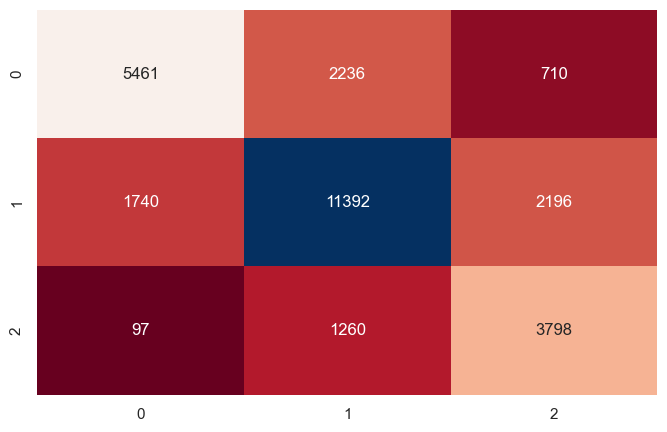

In [203]:
rf2 = RandomForestClassifier(max_depth=10, max_leaf_nodes=120, min_samples_leaf=15,
                       min_samples_split=10, n_estimators=200)
eval_model(rf2,x_train,x_test,y_train,y_test)

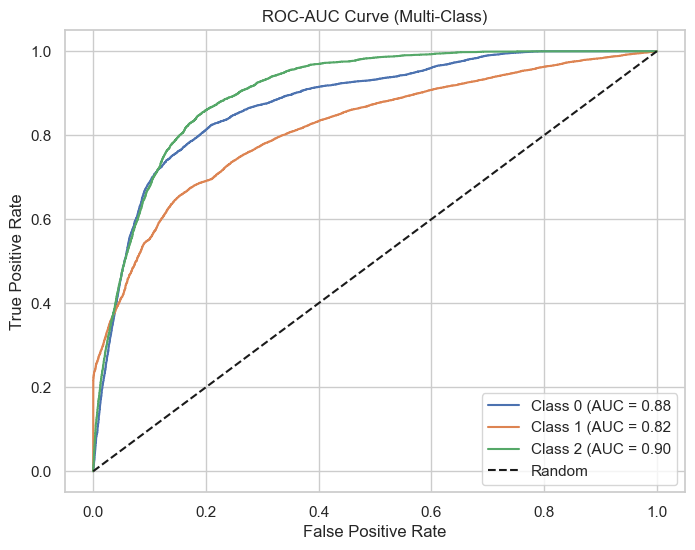

In [204]:
plot_roc_auc(rf2, x_test, y_test)

In [205]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"


In [206]:
# Ensemble Learning

In [207]:
# Bagging Classifier


Training Score is: 99.0 %
Testing Score is: 77.0 %

precision Score is: [0.75 0.79 0.72]
Recall Score is: [0.79 0.79 0.67]
F1 Score is: [0.77 0.79 0.69]

Confusion Matrix is
 [[ 6669  1546   192]
 [ 2092 12086  1150]
 [  100  1608  3447]]

Predictions:
 [0 2 0 ... 2 1 0]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      8407
           1       0.79      0.79      0.79     15328
           2       0.72      0.67      0.69      5155

    accuracy                           0.77     28890
   macro avg       0.76      0.75      0.75     28890
weighted avg       0.77      0.77      0.77     28890



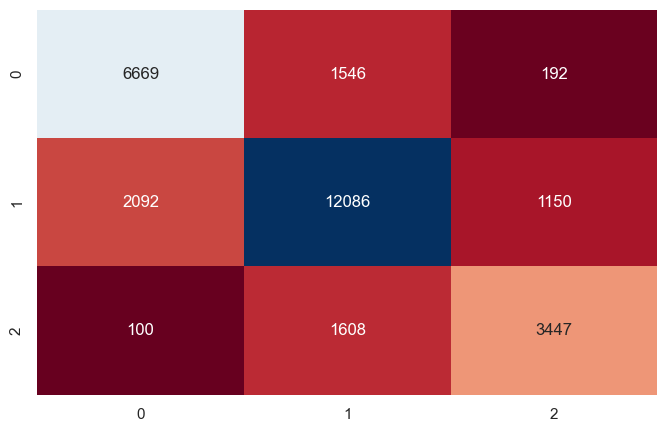

In [208]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

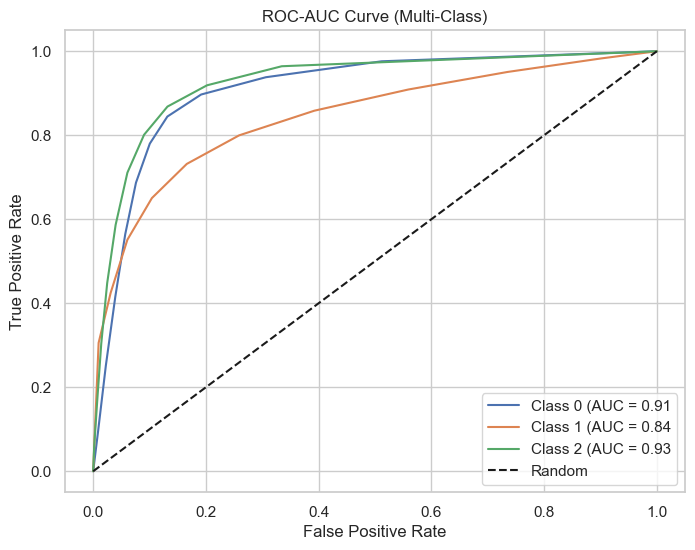

In [209]:
plot_roc_auc(bag, x_test, y_test)

In [210]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"


In [211]:
# AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 70.0 %

precision Score is: [0.68 0.73 0.63]
Recall Score is: [0.67 0.73 0.63]
F1 Score is: [0.67 0.73 0.63]

Confusion Matrix is
 [[ 5643  2518   246]
 [ 2417 11265  1646]
 [  285  1647  3223]]

Predictions:
 [0 2 0 ... 2 1 0]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      8407
           1       0.73      0.73      0.73     15328
           2       0.63      0.63      0.63      5155

    accuracy                           0.70     28890
   macro avg       0.68      0.68      0.68     28890
weighted avg       0.70      0.70      0.70     28890



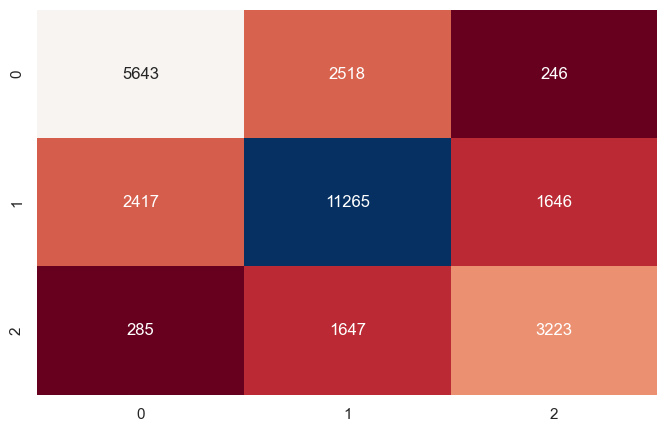

In [212]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

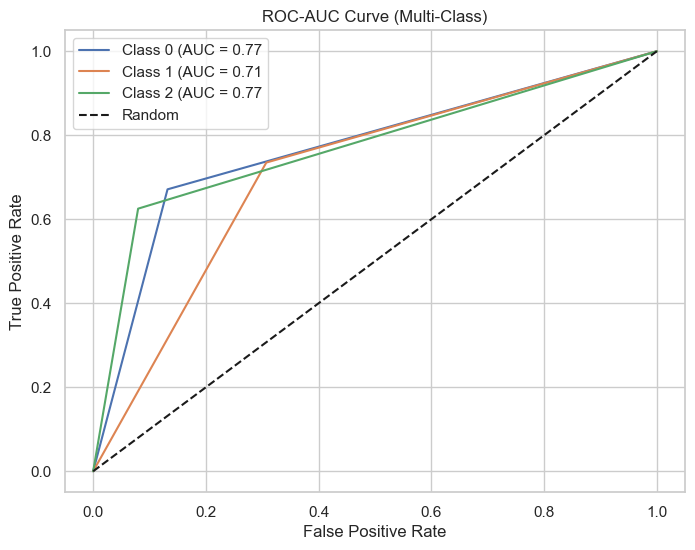

In [213]:
plot_roc_auc(adaboost, x_test, y_test)

In [214]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"
7,Adaboost Ensemble,1.00,0.70,"[0.68, 0.73, 0.63]","[0.67, 0.73, 0.63]","[0.67, 0.73, 0.63]"


In [215]:
# XGBoost Classifier


Training Score is: 72.0 %
Testing Score is: 71.0 %

precision Score is: [0.74 0.76 0.57]
Recall Score is: [0.64 0.75 0.72]
F1 Score is: [0.69 0.75 0.64]

Confusion Matrix is
 [[ 5391  2373   643]
 [ 1760 11475  2093]
 [  129  1334  3692]]

Predictions:
 [0 2 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      8407
           1       0.76      0.75      0.75     15328
           2       0.57      0.72      0.64      5155

    accuracy                           0.71     28890
   macro avg       0.69      0.70      0.69     28890
weighted avg       0.72      0.71      0.71     28890



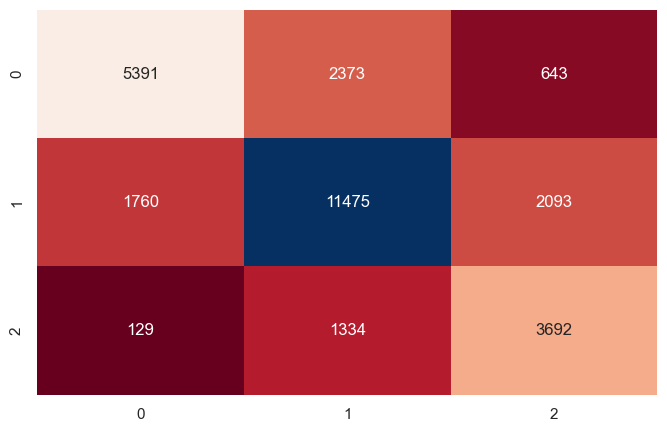

In [216]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

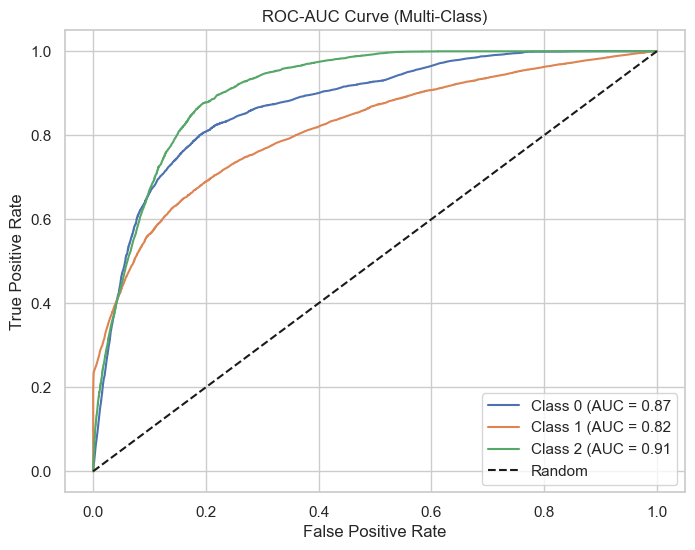

In [217]:
plot_roc_auc(xgbm, x_test, y_test)

In [218]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"
7,Adaboost Ensemble,1.00,0.70,"[0.68, 0.73, 0.63]","[0.67, 0.73, 0.63]","[0.67, 0.73, 0.63]"
8,XG Boost Ensemble,0.72,0.71,"[0.74, 0.76, 0.57]","[0.64, 0.75, 0.72]","[0.69, 0.75, 0.64]"


In [219]:
# Naive Bayes Classifier


Training Score is: 61.0 %
Testing Score is: 60.0 %

precision Score is: [0.6  0.77 0.43]
Recall Score is: [0.63 0.5  0.84]
F1 Score is: [0.62 0.61 0.57]

Confusion Matrix is
 [[5318 1623 1466]
 [3356 7699 4273]
 [ 151  677 4327]]

Predictions:
 [1 2 0 ... 2 1 0]
              precision    recall  f1-score   support

           0       0.60      0.63      0.62      8407
           1       0.77      0.50      0.61     15328
           2       0.43      0.84      0.57      5155

    accuracy                           0.60     28890
   macro avg       0.60      0.66      0.60     28890
weighted avg       0.66      0.60      0.60     28890



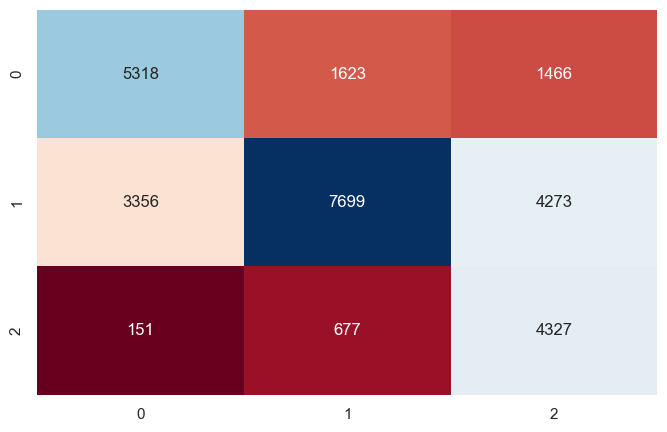

In [220]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

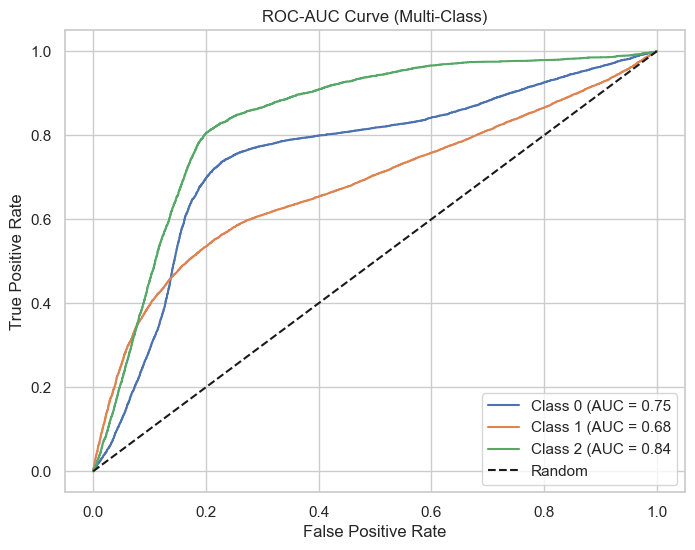

In [221]:
plot_roc_auc(gnb, x_test, y_test)

In [222]:
update_score_card(model_name = 'Naive Bayes Classifier')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"
7,Adaboost Ensemble,1.00,0.70,"[0.68, 0.73, 0.63]","[0.67, 0.73, 0.63]","[0.67, 0.73, 0.63]"
8,XG Boost Ensemble,0.72,0.71,"[0.74, 0.76, 0.57]","[0.64, 0.75, 0.72]","[0.69, 0.75, 0.64]"
9,Naive Bayes Classifier,0.61,0.60,"[0.6, 0.77, 0.43]","[0.63, 0.5, 0.84]","[0.62, 0.61, 0.57]"


In [223]:
# KNN Classifier


Training Score is: 75.0 %
Testing Score is: 65.0 %

precision Score is: [0.64 0.68 0.54]
Recall Score is: [0.72 0.73 0.32]
F1 Score is: [0.68 0.7  0.4 ]

Confusion Matrix is
 [[ 6057  2126   224]
 [ 2988 11148  1192]
 [  378  3137  1640]]

Predictions:
 [0 1 0 ... 2 2 0]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      8407
           1       0.68      0.73      0.70     15328
           2       0.54      0.32      0.40      5155

    accuracy                           0.65     28890
   macro avg       0.62      0.59      0.59     28890
weighted avg       0.64      0.65      0.64     28890



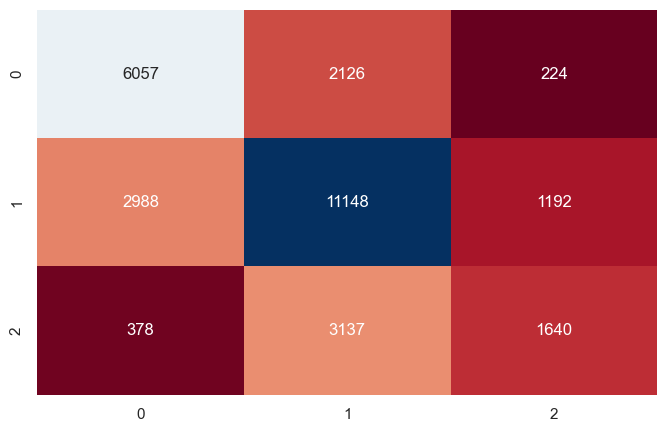

In [224]:
knn1 = KNeighborsClassifier(n_neighbors=6)
eval_model(knn1,x_train,x_test,y_train,y_test)

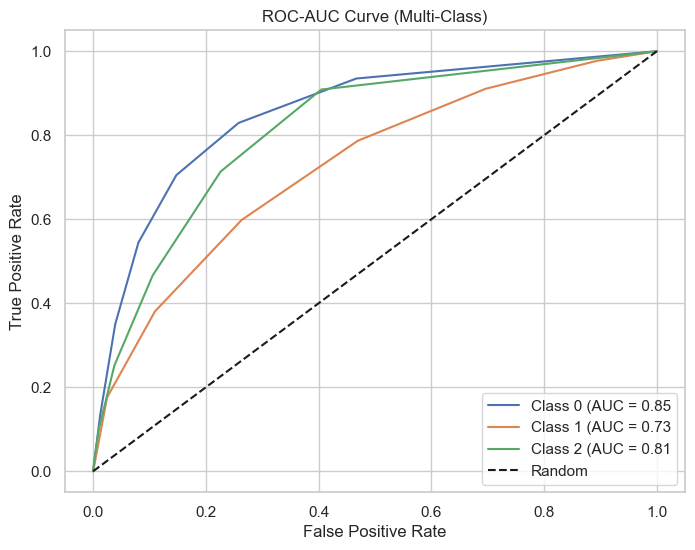

In [225]:
plot_roc_auc(knn1, x_test, y_test)

In [226]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"
7,Adaboost Ensemble,1.00,0.70,"[0.68, 0.73, 0.63]","[0.67, 0.73, 0.63]","[0.67, 0.73, 0.63]"
8,XG Boost Ensemble,0.72,0.71,"[0.74, 0.76, 0.57]","[0.64, 0.75, 0.72]","[0.69, 0.75, 0.64]"
9,Naive Bayes Classifier,0.61,0.60,"[0.6, 0.77, 0.43]","[0.63, 0.5, 0.84]","[0.62, 0.61, 0.57]"


In [227]:
# To find optimal number of neighbors for KNN

In [228]:
# neighbors = list(range(3,15,2))
# knn_acc = []
# for i in neighbors:
#     m = KNeighborsClassifier(n_neighbors=i)
#     m.fit(x_train,y_train)
#     ypred = m.predict(x_test)
#     knn_acc.append(accuracy_score(y_test,ypred))

In [229]:
# plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
# plt.title('Test Accuracy vs No of Neighbors - KNN')
# plt.xlabel('No of Neighbors')
# plt.ylabel('Test Accuracy')
# plt.xticks(neighbors)
# plt.legend()
# plt.grid()
# plt.show()


Training Score is: 83.0 %
Testing Score is: 67.0 %

precision Score is: [0.64 0.71 0.55]
Recall Score is: [0.71 0.71 0.47]
F1 Score is: [0.67 0.71 0.51]

Confusion Matrix is
 [[ 5937  2226   244]
 [ 2766 10831  1731]
 [  515  2194  2446]]

Predictions:
 [0 1 0 ... 2 0 0]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      8407
           1       0.71      0.71      0.71     15328
           2       0.55      0.47      0.51      5155

    accuracy                           0.67     28890
   macro avg       0.64      0.63      0.63     28890
weighted avg       0.66      0.67      0.66     28890



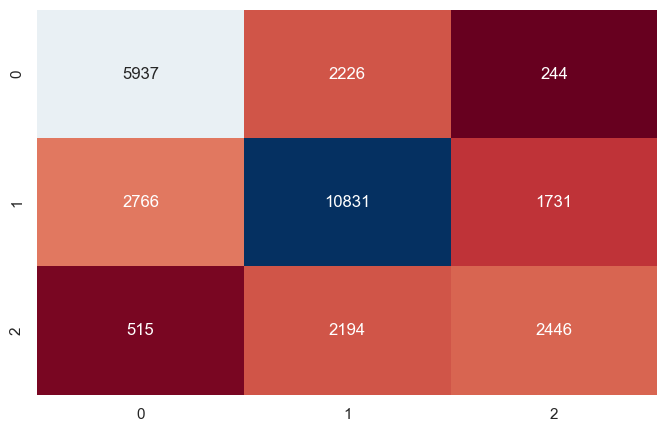

In [230]:
knn2 = KNeighborsClassifier(n_neighbors=3)
eval_model(knn2,x_train,x_test,y_train,y_test)

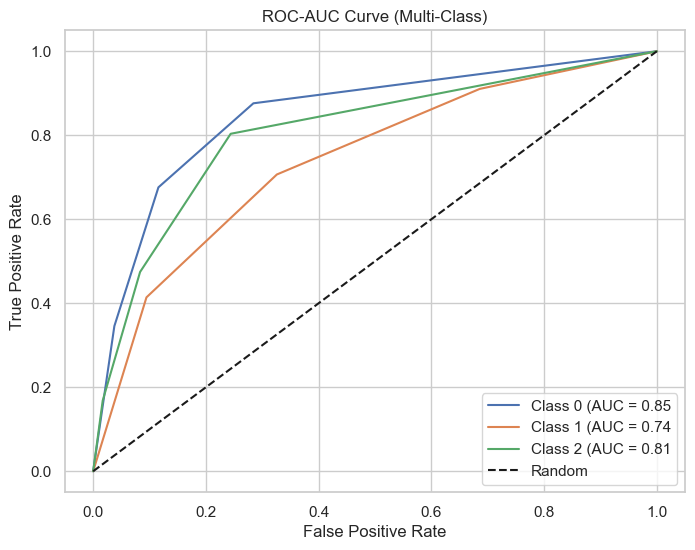

In [231]:
plot_roc_auc(knn2, x_test, y_test)

In [232]:
update_score_card(model_name = 'KNN with tuned parameters')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"
7,Adaboost Ensemble,1.00,0.70,"[0.68, 0.73, 0.63]","[0.67, 0.73, 0.63]","[0.67, 0.73, 0.63]"
8,XG Boost Ensemble,0.72,0.71,"[0.74, 0.76, 0.57]","[0.64, 0.75, 0.72]","[0.69, 0.75, 0.64]"
9,Naive Bayes Classifier,0.61,0.60,"[0.6, 0.77, 0.43]","[0.63, 0.5, 0.84]","[0.62, 0.61, 0.57]"


In [233]:
# Model Comparision

In [234]:
score_card

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.63,0.62,"[0.64, 0.65, 0.51]","[0.47, 0.74, 0.52]","[0.55, 0.69, 0.52]"
1,Logistic Regression using SGD,0.45,0.45,"[0.59, 0.71, 0.29]","[0.53, 0.26, 0.88]","[0.56, 0.38, 0.43]"
2,Decision Tree Classifier,1.00,0.70,"[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]","[0.68, 0.73, 0.63]"
3,Decision Tree with Pruning,0.74,0.71,"[0.74, 0.74, 0.6]","[0.64, 0.77, 0.65]","[0.69, 0.75, 0.62]"
4,Random Forest,1.00,0.80,"[0.79, 0.83, 0.76]","[0.81, 0.81, 0.76]","[0.8, 0.82, 0.76]"
5,Random Forest with Pruning,0.72,0.71,"[0.75, 0.77, 0.57]","[0.65, 0.74, 0.74]","[0.7, 0.75, 0.64]"
6,Bagging Ensemble,0.99,0.77,"[0.75, 0.79, 0.72]","[0.79, 0.79, 0.67]","[0.77, 0.79, 0.69]"
7,Adaboost Ensemble,1.00,0.70,"[0.68, 0.73, 0.63]","[0.67, 0.73, 0.63]","[0.67, 0.73, 0.63]"
8,XG Boost Ensemble,0.72,0.71,"[0.74, 0.76, 0.57]","[0.64, 0.75, 0.72]","[0.69, 0.75, 0.64]"
9,Naive Bayes Classifier,0.61,0.60,"[0.6, 0.77, 0.43]","[0.63, 0.5, 0.84]","[0.62, 0.61, 0.57]"


In [235]:
# Saving the Model
import pickle
pickle.dump(rf1,open('BestFit_model.pkl','wb'))